In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -q kaggle

# Tạo thư mục kaggle và chép file config vào
!mkdir -p ~/.kaggle
!cp "/content/drive/MyDrive/Colab Notebooks/kaggle.json" ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Tạo thư mục đích nếu chưa có
!kaggle datasets download -d immulu/bigearthnetv2-reference-maps

!mkdir -p ./lable_metadata

# Giải nén chỉ 1 file: metadata.parquet
!unzip bigearthnetv2-reference-maps.zip "metadata.parquet" -d ./lable_metadata

Dataset URL: https://www.kaggle.com/datasets/immulu/bigearthnetv2-reference-maps
License(s): Community Data License Agreement - Permissive - Version 1.0
 99% 648M/651M [00:02<00:00, 276MB/s]
100% 651M/651M [00:02<00:00, 329MB/s]
Archive:  bigearthnetv2-reference-maps.zip
  inflating: ./lable_metadata/metadata.parquet  


In [ ]:
!unzip "/content/drive/MyDrive/Document for Capstone/bigearthnet_12band_10m.zip" -d /content/

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
  inflating: /content/content/bigearthnet_12band_10m/S2A_MSIL2A_20170704T112111_N9999_R037_T29SND/S2A_MSIL2A_20170704T112111_N9999_R037_T29SND_41_60_12band.tif  
  inflating: /content/content/bigearthnet_12band_10m/S2A_MSIL2A_20170704T112111_N9999_R037_T29SND/S2A_MSIL2A_20170704T112111_N9999_R037_T29SND_85_77_12band.tif  
  inflating: /content/content/bigearthnet_12band_10m/S2A_MSIL2A_20170704T112111_N9999_R037_T29SND/S2A_MSIL2A_20170704T112111_N9999_R037_T29SND_24_70_12band.tif  
  inflating: /content/content/bigearthnet_12band_10m/S2A_MSIL2A_20170704T112111_N9999_R037_T29SND/S2A_MSIL2A_20170704T112111_N9999_R037_T29SND_78_86_12band.tif  
  inflating: /content/content/bigearthnet_12band_10m/S2A_MSIL2A_20170704T112111_N9999_R037_T29SND/S2A_MSIL2A_20170704T112111_N9999_R037_T29SND_14_53_12band.tif  
  inflating: /content/content/bigearthnet_12band_10m/S2A_MSIL2A_20170704T112111_N9999_R037_T29SND/S2A_MSIL2A_20170704T112111_N9999_R0

In [ ]:
!unzip "/content/drive/MyDrive/Document for Capstone/bigearthnet_12band_10m_1.zip" -d /content/

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
  inflating: /content/content/bigearthnet_12band_10m_1/S2A_MSIL2A_20171101T094131_N9999_R036_T35VNK/S2A_MSIL2A_20171101T094131_N9999_R036_T35VNK_35_31_12band.tif  
  inflating: /content/content/bigearthnet_12band_10m_1/S2A_MSIL2A_20171101T094131_N9999_R036_T35VNK/S2A_MSIL2A_20171101T094131_N9999_R036_T35VNK_64_20_12band.tif  
  inflating: /content/content/bigearthnet_12band_10m_1/S2A_MSIL2A_20171101T094131_N9999_R036_T35VNK/S2A_MSIL2A_20171101T094131_N9999_R036_T35VNK_15_73_12band.tif  
  inflating: /content/content/bigearthnet_12band_10m_1/S2A_MSIL2A_20171101T094131_N9999_R036_T35VNK/S2A_MSIL2A_20171101T094131_N9999_R036_T35VNK_20_25_12band.tif  
  inflating: /content/content/bigearthnet_12band_10m_1/S2A_MSIL2A_20171101T094131_N9999_R036_T35VNK/S2A_MSIL2A_20171101T094131_N9999_R036_T35VNK_64_81_12band.tif  
  inflating: /content/content/bigearthnet_12band_10m_1/S2A_MSIL2A_20171101T094131_N9999_R036_T35VNK/S2A_MSIL2A_20171101T094

In [ ]:
# Di chuyển toàn bộ nội dung từ bigearthnet_12band_10m_1 vào bigearthnet_12band_10m
!mv /content/content/bigearthnet_12band_10m_1/* /content/content/bigearthnet_12band_10m/

# (Tuỳ chọn) Xoá thư mục rỗng bigearthnet_12band_10m_1
!rmdir /content/content/bigearthnet_12band_10m_1

In [ ]:
# !ls -d content/
# check tên
# /content/content/bigearthnet_12band_10m/S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP/S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_26_57_12band.tif

In [ ]:
import pandas as pd

# Đường dẫn đến file metadata.parquet đã giải nén
parquet_path = './lable_metadata/metadata.parquet'

# Đọc file parquet
df = pd.read_parquet(parquet_path)

print(df.columns)

Index(['patch_id', 'labels', 'split', 'country', 's1_name', 's2v1_name',
       'contains_seasonal_snow', 'contains_cloud_or_shadow'],
      dtype='object')


In [ ]:
df["labels"][15]

array(['Arable land', 'Broad-leaved forest', 'Inland waters', 'Pastures',
       'Urban fabric'], dtype=object)

In [ ]:
from collections import Counter
from itertools import chain

# Chuỗi các nhãn được gộp thành 1 danh sách lớn (flattened list)
all_labels = list(chain.from_iterable(df['labels']))

# Đếm tần suất xuất hiện của từng nhãn
label_counts = Counter(all_labels)

# In ra số nhãn duy nhất
print("Số lượng nhãn duy nhất:", len(label_counts))

# In ra danh sách và số lần xuất hiện
print("\nTần suất xuất hiện của từng nhãn:")
for label, count in label_counts.most_common():
    print(f"{label:40s}: {count}")


Số lượng nhãn duy nhất: 19

Tần suất xuất hiện của từng nhãn:
Arable land                             : 188025
Mixed forest                            : 165780
Coniferous forest                       : 154941
Transitional woodland, shrub            : 141150
Broad-leaved forest                     : 135928
Land principally occupied by agriculture, with significant areas of natural vegetation: 122709
Complex cultivation patterns            : 99598
Pastures                                : 95605
Urban fabric                            : 63758
Inland waters                           : 63212
Marine waters                           : 61832
Agro-forestry areas                     : 33181
Permanent crops                         : 29588
Inland wetlands                         : 20919
Moors, heathland and sclerophyllous vegetation: 13894
Natural grassland and sparsely vegetated areas: 11882
Industrial or commercial units          : 11142
Coastal wetlands                        : 1397
Beaches, du

In [ ]:
import pandas as pd
import numpy as np

# Đọc file metadata.parquet
parquet_path = './lable_metadata/metadata.parquet'
df = pd.read_parquet(parquet_path)

# Danh sách 19 lớp chuẩn
class_list = [
    'Arable land',
    'Mixed forest',
    'Coniferous forest',
    'Transitional woodland, shrub',
    'Broad-leaved forest',
    'Land principally occupied by agriculture, with significant areas of natural vegetation',
    'Complex cultivation patterns',
    'Pastures',
    'Urban fabric',
    'Inland waters',
    'Marine waters',
    'Agro-forestry areas',
    'Permanent crops',
    'Inland wetlands',
    'Moors, heathland and sclerophyllous vegetation',
    'Natural grassland and sparsely vegetated areas',
    'Industrial or commercial units',
    'Coastal wetlands',
    'Beaches, dunes, sands'
]

# Tạo ánh xạ từ tên nhãn sang chỉ số
label_to_idx = {label: i for i, label in enumerate(class_list)}

# Hàm chuyển danh sách nhãn thành vector 19 chiều
def encode_labels(label_list):
    vec = np.zeros(len(class_list), dtype=int)
    for label in label_list:
        if label in label_to_idx:
            vec[label_to_idx[label]] = 1
    return vec.tolist()

# Ghi đè cột 'labels' bằng vector 19 chiều (multi-hot)
df['labels'] = df['labels'].apply(encode_labels)

# Kiểm tra kết quả
print(df.head())

# (Tùy chọn) Lưu lại file parquet hoặc CSV
df.to_parquet('metadata_multilabel_encoded.parquet')


                                            patch_id  \
0  S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...   
1  S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...   
2  S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...   
3  S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...   
4  S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...   

                                              labels split  country  \
0  [1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...  test  Austria   
1  [1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...  test  Austria   
2  [1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...  test  Austria   
3  [0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, ...  test  Austria   
4  [0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, ...  test  Austria   

                                        s1_name  \
0  S1B_IW_GRDH_1SDV_20170612T165809_33UUP_26_57   
1  S1B_IW_GRDH_1SDV_20170612T165809_33UUP_27_55   
2  S1B_IW_GRDH_1SDV_20170612T165809_33UUP_27_56   
3  S1B_IW_GRDH_1SDV_20170612T165

In [ ]:
df['labels']

0         [1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...
1         [1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...
2         [1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...
3         [0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, ...
4         [0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, ...
                                ...                        
480033    [0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
480034    [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
480035    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
480036    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
480037    [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: labels, Length: 480038, dtype: object

In [ ]:
import os

# Đường dẫn thư mục chứa ảnh đa phổ đã xử lý
data_dir = "/content/content/bigearthnet_12band_10m"

class_counts = {}
total_images = 0

for label in sorted(os.listdir(data_dir)):
    class_path = os.path.join(data_dir, label)
    if os.path.isdir(class_path):
        n_files = len([f for f in os.listdir(class_path) if f.endswith('.tif')])
        class_counts[label] = n_files
        total_images += n_files

# In kết quả
print("Số lượng ảnh mỗi class:")
for label, count in class_counts.items():
    print(f"Class {label}: {count} ảnh")

print(f"\nTổng số ảnh: {total_images}")

Số lượng ảnh mỗi class:
Class S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP: 3305 ảnh
Class S2A_MSIL2A_20170613T101031_N9999_R022_T34VER: 6686 ảnh
Class S2A_MSIL2A_20170617T113321_N9999_R080_T29UPU: 7986 ảnh
Class S2A_MSIL2A_20170701T093031_N9999_R136_T35VPK: 7997 ảnh
Class S2A_MSIL2A_20170704T112111_N9999_R037_T29SND: 8216 ảnh
Class S2A_MSIL2A_20170717T113321_N9999_R080_T29UPA: 370 ảnh
Class S2A_MSIL2A_20170717T113321_N9999_R080_T29UPV: 6013 ảnh
Class S2A_MSIL2A_20170720T100031_N9999_R122_T34UDG: 1540 ảnh
Class S2A_MSIL2A_20170803T094031_N9999_R036_T34TCR: 4864 ảnh
Class S2A_MSIL2A_20170813T112121_N9999_R037_T29SNC: 8222 ảnh
Class S2A_MSIL2A_20170818T103021_N9999_R108_T32TMT: 4888 ảnh
Class S2A_MSIL2A_20170905T095031_N9999_R079_T35VNL: 8229 ảnh
Class S2A_MSIL2A_20170905T095031_N9999_R079_T35WPN: 2292 ảnh
Class S2A_MSIL2A_20171002T094031_N9999_R036_T34TCR: 4864 ảnh
Class S2A_MSIL2A_20171002T094031_N9999_R036_T34TCS: 627 ảnh
Class S2A_MSIL2A_20171002T112111_N9999_R037_T29SNB: 8165 ảnh
Cl

In [ ]:
df['labels']

0         [1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...
1         [1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...
2         [1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...
3         [0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, ...
4         [0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, ...
                                ...                        
480033    [0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
480034    [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
480035    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
480036    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
480037    [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: labels, Length: 480038, dtype: object

In [ ]:
!pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 76.2 MB/s eta 0:00:00


Shape của ảnh S2A_MSIL2A_20171002T112111_N9999_R037_T29SNB_07_64_12band.tif: (12, 120, 120) (channels, height, width)


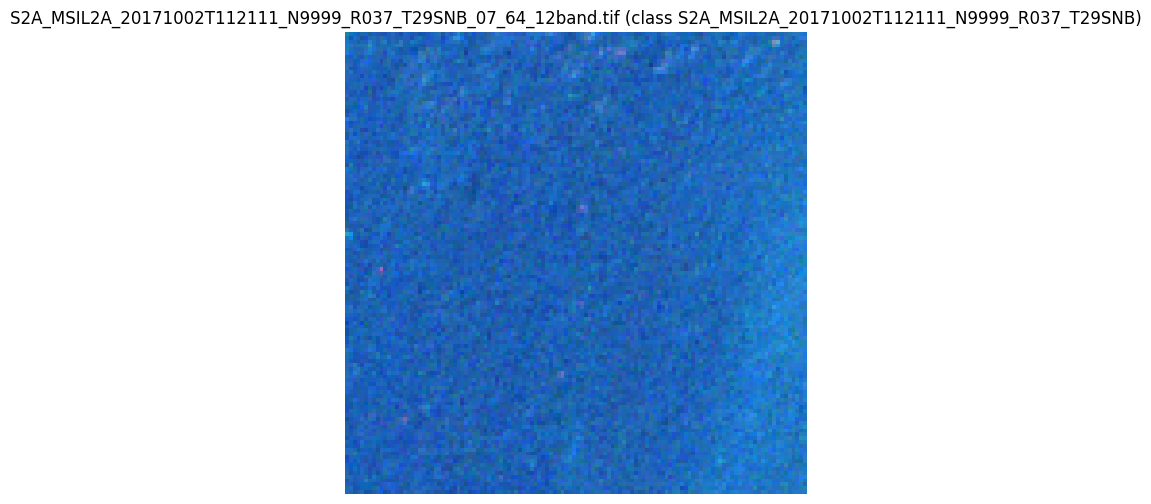

In [ ]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt
import random

# Chọn ngẫu nhiên 1 class và 1 ảnh trong class
random_class = random.choice(os.listdir(data_dir))
img_path = os.path.join(data_dir, random_class)
random_img = random.choice([f for f in os.listdir(img_path) if f.endswith('.tif')])
img_full_path = os.path.join(img_path, random_img)

# Đọc ảnh
with rasterio.open(img_full_path) as src:
    img = src.read()  # shape: (12, H, W)

# In shape
print(f"Shape của ảnh {random_img}: {img.shape} (channels, height, width)")

# Hiển thị ảnh (dùng band 4,3,2 tương ứng RGB)
rgb = np.stack([img[3], img[2], img[1]], axis=-1)  # Chú ý chỉ số bắt đầu từ 0
rgb = rgb.astype(np.float32)
rgb /= np.max(rgb) + 1e-6  # Chuẩn hóa để hiển thị

plt.figure(figsize=(6, 6))
plt.imshow(rgb)
plt.title(f"{random_img} (class {random_class})")
plt.axis('off')
plt.show()


In [ ]:
df['labels']

0         [1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...
1         [1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...
2         [1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...
3         [0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, ...
4         [0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, ...
                                ...                        
480033    [0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
480034    [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
480035    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
480036    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
480037    [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: labels, Length: 480038, dtype: object

In [ ]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from glob import glob

# 1. Đường dẫn gốc chứa các thư mục con
IMAGE_DIR = "/content/content/bigearthnet_12band_10m"

# 2. Đọc metadata chứa patch_id và labels
# df = pd.read_parquet("./lable_metadata/metadata.parquet")

# 3. Duyệt toàn bộ ảnh trong thư mục con, tạo ánh xạ patch_id → đường dẫn ảnh
tif_paths = glob(os.path.join(IMAGE_DIR, "*", "*_12band.tif"))

patch_to_path = {
    os.path.basename(path).replace("_12band.tif", ""): path
    for path in tif_paths
}

# 4. Giữ lại các patch_id có ảnh thật sự
df = df[df['patch_id'].isin(patch_to_path)]

# 5. Gán cột image_path theo ánh xạ tìm được
df['image_path'] = df['patch_id'].map(patch_to_path)

# 6. Chia ngẫu nhiên train/val/test (70/15/15)
train_val_df, test_df = train_test_split(df, test_size=0.15, random_state=42, shuffle=True)
train_df, val_df = train_test_split(train_val_df, test_size=0.1765, random_state=42)

# 7. Tạo danh sách (image_path, labels)
train_list = list(zip(train_df['image_path'], train_df['labels']))
val_list = list(zip(val_df['image_path'], val_df['labels']))
test_list = list(zip(test_df['image_path'], test_df['labels']))

# 8. In kết quả
print(f"Số ảnh train: {len(train_list)}")
print(f"Số ảnh val:   {len(val_list)}")
print(f"Số ảnh test:  {len(test_list)}")

df.head()

Số ảnh train: 71741
Số ảnh val:   15377
Số ảnh test:  15374


patch_id  \
0  S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...   
1  S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...   
2  S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...   
3  S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...   
4  S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...   

                                              labels split  country  \
0  [1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...  test  Austria   
1  [1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...  test  Austria   
2  [1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...  test  Austria   
3  [0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, ...  test  Austria   
4  [0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, ...  test  Austria   

                                        s1_name  \
0  S1B_IW_GRDH_1SDV_20170612T165809_33UUP_26_57   
1  S1B_IW_GRDH_1SDV_20170612T165809_33UUP_27_55   
2  S1B_IW_GRDH_1SDV_20170612T165809_33UUP_27_56   
3  S1B_IW_GRDH_1SDV_20170612T165809_33UUP_27_57   
4  S1B_IW_GRDH_1SDV_20170612T165809_33UUP_27_58   

                          s2v1_name  contains_seasonal_snow  \
0  S2A_MSIL2A_20170613T101031_26_57                   False   
1  S2A_MSIL2A_20170613T101031_27_55                   False   
2  S2A_MSIL2A_20170613T101031_27_56                   False   
3  S2A_MSIL2A_20170613T101031_27_57                   False   
4  S2A_MSIL2A_20170613T101031_27_58                   False   

   contains_cloud_or_shadow                                         image_path  
0                     False  /content/content/bigearthnet_12band_10m/S2A_MS...  
1                     False  /content/content/bigearthnet_12band_10m/S2A_MS...  
2                     False  /content/content/bigearthnet_12band_10m/S2A_MS...  
3                     False  /content/content/bigearthnet_12band_10m/S2A_MS...  
4                     False  /content/content/bigearthnet_12band_10m/S2A_MS...

In [ ]:
train_list[0]

('/content/content/bigearthnet_12band_10m/S2A_MSIL2A_20170803T094031_N9999_R036_T34TCR/S2A_MSIL2A_20170803T094031_N9999_R036_T34TCR_64_29_12band.tif',
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# Kiểm tra những ảnh KHÔNG có trong metadata
tif_patch_ids = set([os.path.basename(p).replace('_12band.tif', '') for p in tif_paths])
metadata_patch_ids = set(df['patch_id'].tolist())

missing_from_metadata = tif_patch_ids - metadata_patch_ids
print(f"Số ảnh KHÔNG có metadata: {len(missing_from_metadata)}")


Số ảnh KHÔNG có metadata: 9718


In [ ]:
# Số ảnh thực sự trong thư mục
print("Tổng số file ảnh .tif:", len(tif_paths))

# Số patch_id có metadata
print("Tổng số patch_id trong metadata:", len(df))

# Số ảnh tồn tại đồng thời cả trong thư mục và metadata
common_ids = set(df['patch_id']).intersection(set(patch_to_path))
print("Số patch_id khớp được cả metadata và ảnh:", len(common_ids))


Tổng số file ảnh .tif: 112210
Tổng số patch_id trong metadata: 102492
Số patch_id khớp được cả metadata và ảnh: 102492


In [ ]:
import os
from glob import glob

# 1. Đường dẫn thư mục ảnh
IMAGE_DIR = "/content/content/bigearthnet_12band_10m"

# 2. Lấy tất cả file .tif (ảnh 12 band) trong mọi thư mục con
tif_paths = glob(os.path.join(IMAGE_DIR, "*", "*_12band.tif"))

# 3. Lấy patch_id từ tên file
tif_patch_ids = set(os.path.basename(p).replace('_12band.tif', '') for p in tif_paths)

# 4. Lấy patch_id từ metadata
import pandas as pd
df = pd.read_parquet("./lable_metadata/metadata.parquet")
metadata_patch_ids = set(df['patch_id'].tolist())

# 5. Tìm ảnh bị thiếu trong metadata
missing_patch_ids = tif_patch_ids - metadata_patch_ids

# 6. In số lượng và một vài ví dụ
print(f"Số ảnh .tif không có metadata: {len(missing_patch_ids)}")
print("Ví dụ các ảnh bị thiếu:")
for pid in list(missing_patch_ids)[:10]:
    print(f"- {pid}_12band.tif")


Số ảnh .tif không có metadata: 9718
Ví dụ các ảnh bị thiếu:
- S2A_MSIL2A_20170701T093031_N9999_R136_T35VPK_10_84_12band.tif
- S2A_MSIL2A_20171101T094131_N9999_R036_T35VNK_65_02_12band.tif
- S2A_MSIL2A_20171101T094131_N9999_R036_T35VNK_70_42_12band.tif
- S2A_MSIL2A_20171101T094131_N9999_R036_T35VNK_55_39_12band.tif
- S2A_MSIL2A_20171101T094131_N9999_R036_T35VNJ_73_47_12band.tif
- S2A_MSIL2A_20171101T094131_N9999_R036_T35VNK_32_33_12band.tif
- S2A_MSIL2A_20170905T095031_N9999_R079_T35VNL_71_69_12band.tif
- S2A_MSIL2A_20171101T094131_N9999_R036_T35VNJ_47_76_12band.tif
- S2A_MSIL2A_20170701T093031_N9999_R136_T35VPK_36_30_12band.tif
- S2A_MSIL2A_20171101T094131_N9999_R036_T35VNJ_37_64_12band.tif


In [ ]:
import pandas as pd

# Đọc metadata
df = pd.read_parquet('./lable_metadata/metadata.parquet')

# Patch cần kiểm tra
patch_id = "S2A_MSIL2A_20170701T093031_N9999_R136_T35VPK_69_71"

# Kiểm tra tồn tại
exists = patch_id in df['patch_id'].values
print(f"Tồn tại trong metadata: {'Có' if exists else 'Không'}")


Tồn tại trong metadata: Không


In [ ]:
!pip install albumentations

In [ ]:
import albumentations as A
from albumentations.pytorch import ToTensorV2

train_transform = A.Compose([
    # A.Normalize(mean=[0]*12, std=[1]*12, max_pixel_value=1.0),

    # A.Resize(224, 224),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.RandomRotate90(p=0.5),
    A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=15, p=0.5),
    A.Normalize(mean=0.0, std=1.0, max_pixel_value=1.0),
    ToTensorV2(transpose_mask=True),
])

val_transform = A.Compose([
    # A.Resize(224, 224),
    A.Normalize(mean=[0]*12, std=[1]*12, max_pixel_value=1.0),
    ToTensorV2(transpose_mask=False)
])


/usr/local/lib/python3.11/dist-packages/albumentations/core/validation.py:114: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)


In [ ]:
from torch.utils.data import Dataset
import torch
import tifffile as tiff

class BigEarthNetDataset(Dataset):
    def __init__(self, data_list, transform=None):
        self.data_list = data_list
        self.transform = transform

    def __len__(self):
        return len(self.data_list)

    def __getitem__(self, idx):
        img_path, label = self.data_list[idx]

        with rasterio.open(img_path) as src:
            image = src.read()  # (12, H, W)

        image = image.astype(np.float32) / 10000.0
        image = np.transpose(image, (1, 2, 0))  # (H, W, C) cho Albumentations

        if self.transform:
            augmented = self.transform(image=image)
            image = augmented['image']
        else:
            image = torch.tensor(np.transpose(image, (2, 0, 1)))  # (C, H, W)

        label = np.array(label, dtype=np.float32)  # ép kiểu numeric
        label = torch.tensor(label, dtype=torch.float32)

        return image, label


In [ ]:
from torch.utils.data import DataLoader

# Batch size
BATCH_SIZE = 64

# Dataset
train_dataset = BigEarthNetDataset(train_list, transform=train_transform)
val_dataset = BigEarthNetDataset(val_list, transform=val_transform)
test_dataset = BigEarthNetDataset(test_list, transform=val_transform)

# DataLoader
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=8, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


In [ ]:
train_dataset[0][1].shape

torch.Size([19])

Label Tensor: tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0.])
Shape: torch.Size([19])
Non-zero class indices: 10
Non-zero class count: 1.0


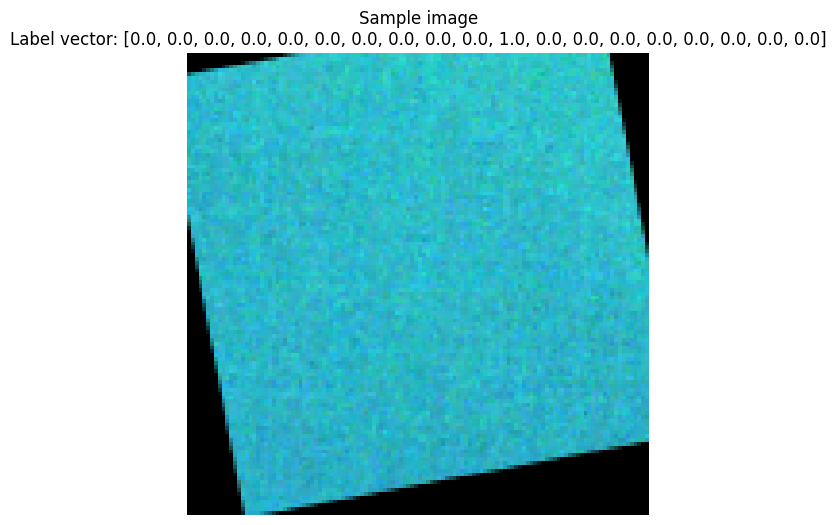

In [ ]:
# Lấy 1 mẫu bất kỳ từ train_dataset
sample_img, sample_label = train_dataset[5]

# Kiểm tra thông tin label
print("Label Tensor:", sample_label)
print("Shape:", sample_label.shape)
print("Non-zero class indices:", torch.nonzero(sample_label).squeeze().tolist())
print("Non-zero class count:", torch.sum(sample_label).item())

# Chuyển tensor về numpy để hiển thị
sample_img_np = sample_img.numpy().transpose(1, 2, 0)  # (H, W, C)

# Lấy lại các band RGB (band 4, 3, 2 --> index 3, 2, 1)
rgb = sample_img_np[:, :, [3, 2, 1]]

# Chuẩn hóa về [0, 1] nếu cần (nếu bạn đã normalize thì giá trị có thể lệch)
rgb = (rgb - rgb.min()) / (rgb.max() - rgb.min() + 1e-6)

# Hiển thị ảnh
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
plt.imshow(rgb)
plt.title(f"Sample image\nLabel vector: {sample_label.tolist()}")
plt.axis("off")
plt.show()


In [ ]:
!pip install timm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 116.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 97.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 41.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 76.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninsta

In [ ]:
!pip install efficientnet_pytorch

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Luôn dùng CPU
device = torch.device("cpu")
print("⚡ Using device:", device)

# Load model ViT đã huấn luyện (trên CPU)
model_path = "/content/drive/MyDrive/Document for Capstone/Model/EfficientNet/t-capstone-process-bigearth-nhan-efficientnet-v3.pth"
# model_path = "/content/drive/MyDrive/my_pytorch_model_bigearth_1.pth"
model = torch.load(model_path, map_location=device, weights_only=False)
model.eval()
print("Model loaded and moved to", device)
# print(model.head)

random_image = torch.rand((12, 224, 224), dtype=torch.float32)

with torch.no_grad():
    output = model(random_image.unsqueeze(0))
    output = torch.sigmoid(output)
    predicted = (output.squeeze() > 0.5).cpu().numpy()  # Threshold 0.5 để multi-label

# print("Predicted Labels (binary vector):\n", predicted)
print("Output sigmoid:\n", output.squeeze().cpu().numpy())
print("Predicted Labels:\n", predicted)

SHAP

In [ ]:
!pip install shap

chạy riêng giải thích 12 bands cho từng class (kh for)

In [ ]:
# Import thư viện
import torch
import torch.nn as nn
import shap
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from tqdm import tqdm
import timm
import random

# model_path = "/content/drive/MyDrive/my_pytorch_model_bigearth_1.pth"
# Chọn device: ưu tiên GPU nếu có
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model = torch.load(model_path, map_location=device, weights_only=False)
# model.eval()
# print("Model loaded and moved to", device)

# Wrapper model cho 1 class
class_idx = 1  # Thay class bạn muốn xem (0-18)
class MultiLabelModel(nn.Module):
    def __init__(self, base_model, class_idx):
        super().__init__()
        self.base_model = base_model
        self.class_idx = class_idx

    def forward(self, x):
        logits = torch.sigmoid(self.base_model(x))
        return logits[:, self.class_idx].unsqueeze(-1)  # shape (batch, 1)

class_model = MultiLabelModel(model, class_idx).to(device)

# Background & test images
background_imgs = []
num_needed = 150  # số lượng background cần lấy

for imgs, labels in test_loader:
    # labels shape: (batch_size, num_classes)
    # Kiểm tra xem ảnh nào trong batch có chứa class_idx (=1, kh chứa là =0)
    mask = labels[:, class_idx] == 0  # multi-label binary
    selected_imgs = imgs[mask]

    # Thêm các ảnh có chứa class_idx vào danh sách
    background_imgs.append(selected_imgs)

    # Kiểm tra đã đủ số lượng chưa
    total_found = sum(img.shape[0] for img in background_imgs)
    if total_found >= num_needed:
        break
# Nối lại thành tensor
background_imgs = torch.cat(background_imgs, dim=0)[:num_needed].to(device)

# Danh sách lưu index các ảnh mà model dự đoán có class_i
predicted_indices = []

# Số lượng ảnh muốn explain
num_explain = 1000

print(f"🔎 Đang tìm {num_explain} ảnh mà model dự đoán có class {class_idx}...")

for idx in range(len(test_dataset)):
    img, _ = test_dataset[idx]
    img_batch = img.unsqueeze(0).to(device)  # thêm batch dim

    with torch.no_grad():
        prob = model(img_batch)[0, class_idx].item()
        pred = int(prob > 0.5)

    # Nếu model dự đoán class_i → thêm vào danh sách
    if pred == 1:
        predicted_indices.append(idx)
        print(f"Found at index {idx} (prob={prob:.3f})")

    # Dừng khi đủ số lượng
    if len(predicted_indices) >= num_explain:
        print(f"🎯 Đã tìm đủ {num_explain} ảnh.")
        break

# Kiểm tra nếu không đủ số lượng
if len(predicted_indices) < num_explain:
    # raise ValueError(f"Chỉ tìm được {len(predicted_indices)} ảnh, không đủ {num_explain} để explain.")
    print(f"⚠️ Chỉ tìm được {len(predicted_indices)} ảnh, sẽ tiếp tục với số lượng này.")

# Lấy các ảnh và labels để explain
test_imgs_list, test_labels_list = [], []
for idx in predicted_indices:
    img, label = test_dataset[idx]
    test_imgs_list.append(img.unsqueeze(0))  # thêm batch dim
    test_labels_list.append(label)

# Stack thành batch (num_explain, C, H, W)
test_imgs = torch.cat(test_imgs_list, dim=0).to(device)
test_labels = torch.stack(test_labels_list)

with torch.no_grad():
    probs = model(test_imgs)
    preds = (probs > 0.5).int()

# Hiển thị thông tin từng ảnh
for i in range(num_explain):
    print(f"Ảnh {i+1}:")
    print("  True labels:    ", test_labels_list[i].numpy())
    print("  Predicted probs:", np.round(probs[i].cpu().numpy(), 3))
    print("  Predicted labels:", preds[i].cpu().numpy())
    print(f"  Class {class_idx} probability: {probs[i, class_idx].item():.4f}\n")

# GradientExplainer
explainer = shap.GradientExplainer(class_model, background_imgs)

# Tính SHAP values
print(f"Calculating SHAP for class {class_idx} ...")
shap_values = explainer.shap_values(test_imgs)


Streaming output truncated to the last 5000 lines.
  -4.604 -14.561 -20.563 -12.761  -4.52  -11.165 -10.752  -4.237 -17.469
 -21.676]
  Predicted labels: [0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0]
  Class 1 probability: 2.3766

Ảnh 379:
  True labels:     [0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  Predicted probs: [ -5.714   2.638   2.42    3.     -0.566  -4.081  -9.085  -9.014  -8.189
  -3.48  -18.027 -14.069  -7.797  -5.208 -11.766 -10.374  -8.862 -19.912
 -21.258]
  Predicted labels: [0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
  Class 1 probability: 2.6376

Ảnh 380:
  True labels:     [0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  Predicted probs: [ -0.318   4.275   1.825  -0.447  -3.367   1.619 -11.827 -12.276  -4.53
  -3.684 -11.354 -16.724 -15.537  -4.825 -14.972 -13.7    -7.94  -12.16
 -29.291]
  Predicted labels: [0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
  Class 1 probability: 4.2746

Ảnh 381:
  True labels:     [0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 

(1000, 12, 120, 120, 1)
shap_array shape: (1000, 12, 120, 120)
mean_total_signed shape: (12,)


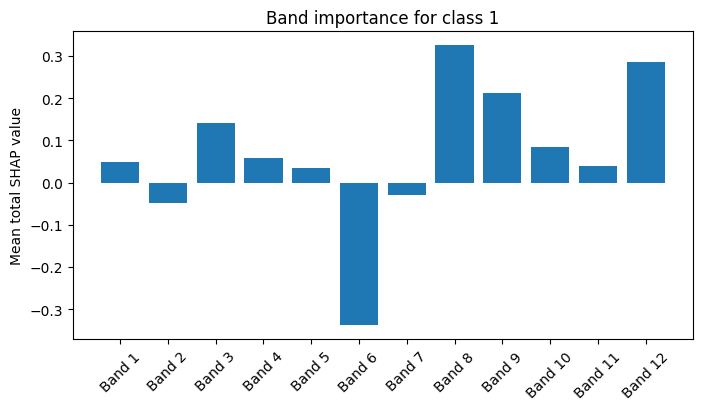

In [ ]:
print(shap_values.shape)  # (10, 12, 224, 224, 1)
shap_array = np.squeeze(shap_values)  # shape (10, 12, 224, 224)
print("shap_array shape:", shap_array.shape)

# Tổng SHAP theo từng band trên mỗi ảnh
total_shap = shap_array.sum(axis=(2, 3))  # shape (10, 12)

# Trung bình trên toàn bộ ảnh
mean_total_signed = total_shap.mean(axis=0)  # shape (12,)
print("mean_total_signed shape:", mean_total_signed.shape)

# Vẽ bar chart
plt.figure(figsize=(8, 4))
plt.bar(np.arange(1, 13), mean_total_signed)
plt.xticks(np.arange(1, 13), [f'Band {i}' for i in range(1, 13)], rotation=45)
plt.ylabel('Mean total SHAP value')
plt.title(f'Band importance for class {class_idx}')
plt.show()


Streaming output truncated to the last 5000 lines.
  Class 2 probability: 6.1585

Ảnh 378:
  True labels:     [0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  Predicted probs: [ -5.308   0.715   3.829  -0.601  -6.629  -4.1   -11.207 -11.195  -8.188
   2.894 -11.785 -19.109 -17.789   3.486 -16.415 -15.374 -12.12  -16.292
 -29.241]
  Predicted labels: [0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0]
  Class 2 probability: 3.8292

Ảnh 379:
  True labels:     [0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
  Predicted probs: [ -0.589   0.612   0.808  -2.921  -3.695  -0.182  -5.639  -7.952   6.764
  -4.376  -7.135 -12.745  -8.372  -5.963 -10.008 -12.143  -1.304  -9.035
 -14.348]
  Predicted labels: [0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
  Class 2 probability: 0.8082

Ảnh 380:
  True labels:     [0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
  Predicted probs: [ -3.232  -2.123   1.029  -0.771  -3.204  -2.841  -4.24    6.103  -6.381
  -7.665 -14.479 -14.023 -10.742 

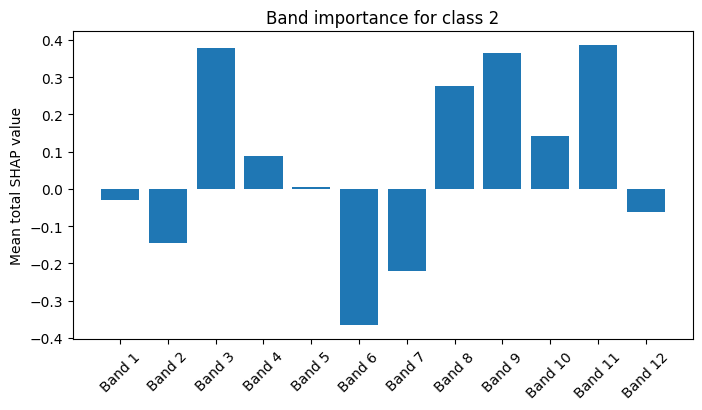

In [ ]:
# Import thư viện
import torch
import torch.nn as nn
import shap
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from tqdm import tqdm
import timm
import random

# model_path = "/content/drive/MyDrive/my_pytorch_model_bigearth_1.pth"
# Chọn device: ưu tiên GPU nếu có
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model = torch.load(model_path, map_location=device, weights_only=False)
# model.eval()
# print("Model loaded and moved to", device)

# Wrapper model cho 1 class
class_idx = 2  # Thay class bạn muốn xem (0-18)
class MultiLabelModel(nn.Module):
    def __init__(self, base_model, class_idx):
        super().__init__()
        self.base_model = base_model
        self.class_idx = class_idx

    def forward(self, x):
        logits = torch.sigmoid(self.base_model(x))
        return logits[:, self.class_idx].unsqueeze(-1)  # shape (batch, 1)

class_model = MultiLabelModel(model, class_idx).to(device)

# Background & test images
background_imgs = []
num_needed = 150  # số lượng background cần lấy

for imgs, labels in test_loader:
    # labels shape: (batch_size, num_classes)
    # Kiểm tra xem ảnh nào trong batch có chứa class_idx (=1, kh chứa là =0)
    mask = labels[:, class_idx] == 0  # multi-label binary
    selected_imgs = imgs[mask]

    # Thêm các ảnh có chứa class_idx vào danh sách
    background_imgs.append(selected_imgs)

    # Kiểm tra đã đủ số lượng chưa
    total_found = sum(img.shape[0] for img in background_imgs)
    if total_found >= num_needed:
        break
# Nối lại thành tensor
background_imgs = torch.cat(background_imgs, dim=0)[:num_needed].to(device)

# Danh sách lưu index các ảnh mà model dự đoán có class_i
predicted_indices = []

# Số lượng ảnh muốn explain
num_explain = 1000

print(f"🔎 Đang tìm {num_explain} ảnh mà model dự đoán có class {class_idx}...")

for idx in range(len(test_dataset)):
    img, _ = test_dataset[idx]
    img_batch = img.unsqueeze(0).to(device)  # thêm batch dim

    with torch.no_grad():
        prob = model(img_batch)[0, class_idx].item()
        pred = int(prob > 0.5)

    # Nếu model dự đoán class_i → thêm vào danh sách
    if pred == 1:
        predicted_indices.append(idx)
        print(f"Found at index {idx} (prob={prob:.3f})")

    # Dừng khi đủ số lượng
    if len(predicted_indices) >= num_explain:
        print(f"Đã tìm đủ {num_explain} ảnh.")
        break

# Kiểm tra nếu không đủ số lượng
if len(predicted_indices) < num_explain:
    # raise ValueError(f" Chỉ tìm được {len(predicted_indices)} ảnh, không đủ {num_explain} để explain.")
    print(f"⚠️ Chỉ tìm được {len(predicted_indices)} ảnh, sẽ tiếp tục với số lượng này.")

# Lấy các ảnh và labels để explain
test_imgs_list, test_labels_list = [], []
for idx in predicted_indices:
    img, label = test_dataset[idx]
    test_imgs_list.append(img.unsqueeze(0))  # thêm batch dim
    test_labels_list.append(label)

# Stack thành batch (num_explain, C, H, W)
test_imgs = torch.cat(test_imgs_list, dim=0).to(device)
test_labels = torch.stack(test_labels_list)

with torch.no_grad():
    probs = model(test_imgs)
    preds = (probs > 0.5).int()

# Hiển thị thông tin từng ảnh
for i in range(num_explain):
    print(f"Ảnh {i+1}:")
    print("  True labels:    ", test_labels_list[i].numpy())
    print("  Predicted probs:", np.round(probs[i].cpu().numpy(), 3))
    print("  Predicted labels:", preds[i].cpu().numpy())
    print(f"  Class {class_idx} probability: {probs[i, class_idx].item():.4f}\n")

# GradientExplainer
explainer = shap.GradientExplainer(class_model, background_imgs)

# Tính SHAP values
print(f"Calculating SHAP for class {class_idx} ...")
shap_values = explainer.shap_values(test_imgs)

print(shap_values.shape)  # (10, 12, 224, 224, 1)
shap_array = np.squeeze(shap_values)  # shape (10, 12, 224, 224)
print("shap_array shape:", shap_array.shape)

# Tổng SHAP theo từng band trên mỗi ảnh
total_shap = shap_array.sum(axis=(2, 3))  # shape (10, 12)

# Trung bình trên toàn bộ ảnh
mean_total_signed = total_shap.mean(axis=0)  # shape (12,)
print("mean_total_signed shape:", mean_total_signed.shape)

# Vẽ bar chart
plt.figure(figsize=(8, 4))
plt.bar(np.arange(1, 13), mean_total_signed)
plt.xticks(np.arange(1, 13), [f'Band {i}' for i in range(1, 13)], rotation=45)
plt.ylabel('Mean total SHAP value')
plt.title(f'Band importance for class {class_idx}')
plt.show()

Streaming output truncated to the last 5000 lines.
  Predicted labels: [0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
  Class 3 probability: 2.7908

Ảnh 374:
  True labels:     [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  Predicted probs: [ -3.315  -2.507  -5.345   2.338   4.615  -3.876  -3.924  -6.054  -8.236
  -7.703 -20.272  -3.475  -4.613 -11.6    -5.955  -8.744  -6.3   -14.642
 -20.485]
  Predicted labels: [0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
  Class 3 probability: 2.3382

Ảnh 375:
  True labels:     [0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
  Predicted probs: [ -6.502  -1.71    6.927   2.92   -7.148  -4.089  -7.95   -8.164 -10.87
  -3.544 -19.264 -16.393 -12.906   0.754  -9.539  -9.573 -13.332 -22.425
 -28.24 ]
  Predicted labels: [0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
  Class 3 probability: 2.9205

Ảnh 376:
  True labels:     [0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  Predicted probs: [ -2.52   -1.51   -3.594   2.227   4.006  -3.68

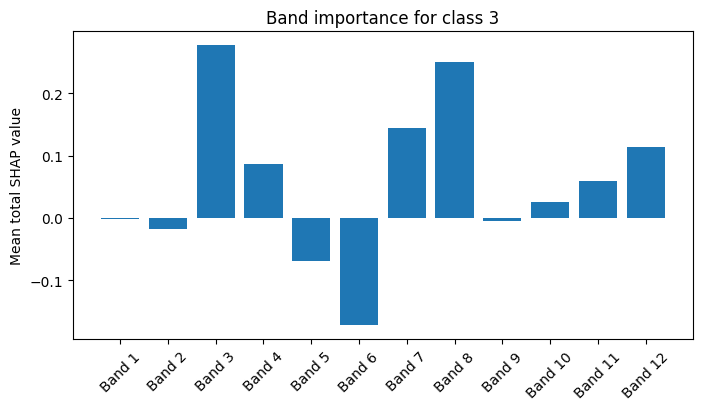

In [ ]:
# Import thư viện
import torch
import torch.nn as nn
import shap
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from tqdm import tqdm
import timm
import random

# model_path = "/content/drive/MyDrive/my_pytorch_model_bigearth_1.pth"
# Chọn device: ưu tiên GPU nếu có
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model = torch.load(model_path, map_location=device, weights_only=False)
# model.eval()
# print("Model loaded and moved to", device)

# Wrapper model cho 1 class
class_idx = 3  # Thay class bạn muốn xem (0-18)
class MultiLabelModel(nn.Module):
    def __init__(self, base_model, class_idx):
        super().__init__()
        self.base_model = base_model
        self.class_idx = class_idx

    def forward(self, x):
        logits = torch.sigmoid(self.base_model(x))
        return logits[:, self.class_idx].unsqueeze(-1)  # shape (batch, 1)

class_model = MultiLabelModel(model, class_idx).to(device)

# Background & test images
background_imgs = []
num_needed = 150  # số lượng background cần lấy

for imgs, labels in test_loader:
    # labels shape: (batch_size, num_classes)
    # Kiểm tra xem ảnh nào trong batch có chứa class_idx (=1, kh chứa là =0)
    mask = labels[:, class_idx] == 0  # multi-label binary
    selected_imgs = imgs[mask]

    # Thêm các ảnh có chứa class_idx vào danh sách
    background_imgs.append(selected_imgs)

    # Kiểm tra đã đủ số lượng chưa
    total_found = sum(img.shape[0] for img in background_imgs)
    if total_found >= num_needed:
        break
# Nối lại thành tensor
background_imgs = torch.cat(background_imgs, dim=0)[:num_needed].to(device)

# Danh sách lưu index các ảnh mà model dự đoán có class_i
predicted_indices = []

# Số lượng ảnh muốn explain
num_explain = 1000

print(f"🔎 Đang tìm {num_explain} ảnh mà model dự đoán có class {class_idx}...")

for idx in range(len(test_dataset)):
    img, _ = test_dataset[idx]
    img_batch = img.unsqueeze(0).to(device)  # thêm batch dim

    with torch.no_grad():
        prob = model(img_batch)[0, class_idx].item()
        pred = int(prob > 0.5)

    # Nếu model dự đoán class_i → thêm vào danh sách
    if pred == 1:
        predicted_indices.append(idx)
        print(f"Found at index {idx} (prob={prob:.3f})")

    # Dừng khi đủ số lượng
    if len(predicted_indices) >= num_explain:
        print(f"Đã tìm đủ {num_explain} ảnh.")
        break

# Kiểm tra nếu không đủ số lượng
if len(predicted_indices) < num_explain:
    # raise ValueError(f"Chỉ tìm được {len(predicted_indices)} ảnh, không đủ {num_explain} để explain.")
    print(f"Chỉ tìm được {len(predicted_indices)} ảnh, sẽ tiếp tục với số lượng này.")

# Lấy các ảnh và labels để explain
test_imgs_list, test_labels_list = [], []
for idx in predicted_indices:
    img, label = test_dataset[idx]
    test_imgs_list.append(img.unsqueeze(0))  # thêm batch dim
    test_labels_list.append(label)

# Stack thành batch (num_explain, C, H, W)
test_imgs = torch.cat(test_imgs_list, dim=0).to(device)
test_labels = torch.stack(test_labels_list)

with torch.no_grad():
    probs = model(test_imgs)
    preds = (probs > 0.5).int()

# Hiển thị thông tin từng ảnh
for i in range(num_explain):
    print(f"Ảnh {i+1}:")
    print("  True labels:    ", test_labels_list[i].numpy())
    print("  Predicted probs:", np.round(probs[i].cpu().numpy(), 3))
    print("  Predicted labels:", preds[i].cpu().numpy())
    print(f"  Class {class_idx} probability: {probs[i, class_idx].item():.4f}\n")

# GradientExplainer
explainer = shap.GradientExplainer(class_model, background_imgs)

# Tính SHAP values
print(f"Calculating SHAP for class {class_idx} ...")
shap_values = explainer.shap_values(test_imgs)

print(shap_values.shape)  # (10, 12, 224, 224, 1)
shap_array = np.squeeze(shap_values)  # shape (10, 12, 224, 224)
print("shap_array shape:", shap_array.shape)

# Tổng SHAP theo từng band trên mỗi ảnh
total_shap = shap_array.sum(axis=(2, 3))  # shape (10, 12)

# Trung bình trên toàn bộ ảnh
mean_total_signed = total_shap.mean(axis=0)  # shape (12,)
print("mean_total_signed shape:", mean_total_signed.shape)

# Vẽ bar chart
plt.figure(figsize=(8, 4))
plt.bar(np.arange(1, 13), mean_total_signed)
plt.xticks(np.arange(1, 13), [f'Band {i}' for i in range(1, 13)], rotation=45)
plt.ylabel('Mean total SHAP value')
plt.title(f'Band importance for class {class_idx}')
plt.show()

Streaming output truncated to the last 5000 lines.
 -24.213]
  Predicted labels: [1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
  Class 4 probability: 1.7870

Ảnh 377:
  True labels:     [1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
  Predicted probs: [  0.183  -0.46   -1.445   0.984   1.572  -2.486  -1.893  -0.033  -6.032
  -3.839 -10.062   0.524  -1.909  -6.944  -3.706  -3.659  -4.582  -5.747
 -12.867]
  Predicted labels: [0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
  Class 4 probability: 1.5716

Ảnh 378:
  True labels:     [1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  Predicted probs: [  0.348  -1.672  -1.075   3.457   1.343  -1.945  -1.507  -1.007  -5.766
  -4.987 -12.255  -1.318  -1.776  -8.847  -2.831  -3.551  -4.402  -7.354
  -9.367]
  Predicted labels: [0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
  Class 4 probability: 1.3433

Ảnh 379:
  True labels:     [0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
  Predicted probs: [ -0.24   -0.259  -2.297   0.428   2

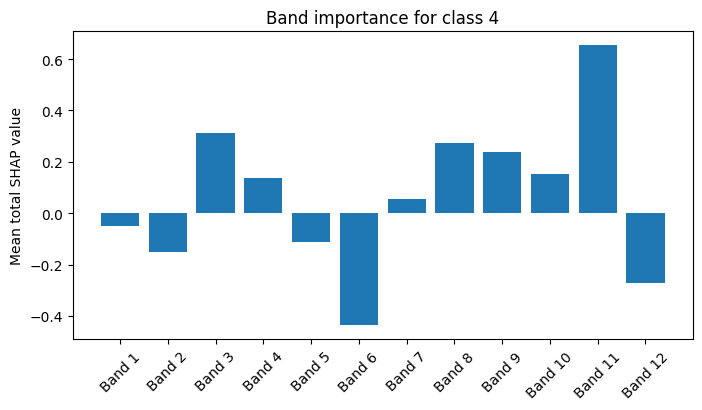

In [ ]:
# Import thư viện
import torch
import torch.nn as nn
import shap
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from tqdm import tqdm
import timm
import random

# model_path = "/content/drive/MyDrive/my_pytorch_model_bigearth_1.pth"
# Chọn device: ưu tiên GPU nếu có
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model = torch.load(model_path, map_location=device, weights_only=False)
# model.eval()
# print("Model loaded and moved to", device)

# Wrapper model cho 1 class
class_idx = 4  # Thay class bạn muốn xem (0-18)
class MultiLabelModel(nn.Module):
    def __init__(self, base_model, class_idx):
        super().__init__()
        self.base_model = base_model
        self.class_idx = class_idx

    def forward(self, x):
        logits = torch.sigmoid(self.base_model(x))
        return logits[:, self.class_idx].unsqueeze(-1)  # shape (batch, 1)

class_model = MultiLabelModel(model, class_idx).to(device)

# Background & test images
background_imgs = []
num_needed = 150  # số lượng background cần lấy

for imgs, labels in test_loader:
    # labels shape: (batch_size, num_classes)
    # Kiểm tra xem ảnh nào trong batch có chứa class_idx (=1, kh chứa là =0)
    mask = labels[:, class_idx] == 0  # multi-label binary
    selected_imgs = imgs[mask]

    # Thêm các ảnh có chứa class_idx vào danh sách
    background_imgs.append(selected_imgs)

    # Kiểm tra đã đủ số lượng chưa
    total_found = sum(img.shape[0] for img in background_imgs)
    if total_found >= num_needed:
        break
# Nối lại thành tensor
background_imgs = torch.cat(background_imgs, dim=0)[:num_needed].to(device)

# Danh sách lưu index các ảnh mà model dự đoán có class_i
predicted_indices = []

# Số lượng ảnh muốn explain
num_explain = 1000

print(f"Đang tìm {num_explain} ảnh mà model dự đoán có class {class_idx}...")

for idx in range(len(test_dataset)):
    img, _ = test_dataset[idx]
    img_batch = img.unsqueeze(0).to(device)  # thêm batch dim

    with torch.no_grad():
        prob = model(img_batch)[0, class_idx].item()
        pred = int(prob > 0.5)

    # Nếu model dự đoán class_i → thêm vào danh sách
    if pred == 1:
        predicted_indices.append(idx)
        print(f"Found at index {idx} (prob={prob:.3f})")

    # Dừng khi đủ số lượng
    if len(predicted_indices) >= num_explain:
        print(f"Đã tìm đủ {num_explain} ảnh.")
        break

# Kiểm tra nếu không đủ số lượng
if len(predicted_indices) < num_explain:
    # raise ValueError(f"Chỉ tìm được {len(predicted_indices)} ảnh, không đủ {num_explain} để explain.")
    print(f"Chỉ tìm được {len(predicted_indices)} ảnh, sẽ tiếp tục với số lượng này.")

# Lấy các ảnh và labels để explain
test_imgs_list, test_labels_list = [], []
for idx in predicted_indices:
    img, label = test_dataset[idx]
    test_imgs_list.append(img.unsqueeze(0))  # thêm batch dim
    test_labels_list.append(label)

# Stack thành batch (num_explain, C, H, W)
test_imgs = torch.cat(test_imgs_list, dim=0).to(device)
test_labels = torch.stack(test_labels_list)

with torch.no_grad():
    probs = model(test_imgs)
    preds = (probs > 0.5).int()

# Hiển thị thông tin từng ảnh
for i in range(num_explain):
    print(f"Ảnh {i+1}:")
    print("  True labels:    ", test_labels_list[i].numpy())
    print("  Predicted probs:", np.round(probs[i].cpu().numpy(), 3))
    print("  Predicted labels:", preds[i].cpu().numpy())
    print(f"  Class {class_idx} probability: {probs[i, class_idx].item():.4f}\n")

# GradientExplainer
explainer = shap.GradientExplainer(class_model, background_imgs)

# Tính SHAP values
print(f"Calculating SHAP for class {class_idx} ...")
shap_values = explainer.shap_values(test_imgs)

print(shap_values.shape)  # (10, 12, 224, 224, 1)
shap_array = np.squeeze(shap_values)  # shape (10, 12, 224, 224)
print("shap_array shape:", shap_array.shape)

# Tổng SHAP theo từng band trên mỗi ảnh
total_shap = shap_array.sum(axis=(2, 3))  # shape (10, 12)

# Trung bình trên toàn bộ ảnh
mean_total_signed = total_shap.mean(axis=0)  # shape (12,)
print("mean_total_signed shape:", mean_total_signed.shape)

# Vẽ bar chart
plt.figure(figsize=(8, 4))
plt.bar(np.arange(1, 13), mean_total_signed)
plt.xticks(np.arange(1, 13), [f'Band {i}' for i in range(1, 13)], rotation=45)
plt.ylabel('Mean total SHAP value')
plt.title(f'Band importance for class {class_idx}')
plt.show()

Streaming output truncated to the last 5000 lines.
  True labels:     [0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
  Predicted probs: [ -3.507  -1.785  -5.761  -0.888   2.978   0.728  -0.57   -3.768  -3.686
  -7.    -15.737  -4.49   -0.17   -9.522  -1.419  -6.089  -8.385 -13.587
 -21.411]
  Predicted labels: [0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
  Class 5 probability: 0.7276

Ảnh 377:
  True labels:     [1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  Predicted probs: [  1.879  -0.896  -1.596  -6.681  -4.198   2.391   1.106   2.659   1.409
  -6.469 -12.024 -21.277 -11.6    -6.602 -11.228 -13.403  -4.235 -18.578
 -19.687]
  Predicted labels: [1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
  Class 5 probability: 2.3912

Ảnh 378:
  True labels:     [1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  Predicted probs: [  2.055  -0.143   4.79   -1.836  -6.382   1.064  -7.155  -8.155  -3.342
  -3.425  -6.096 -15.199 -13.234  -3.962 -10.972 -12.693  -6.632 -12.115


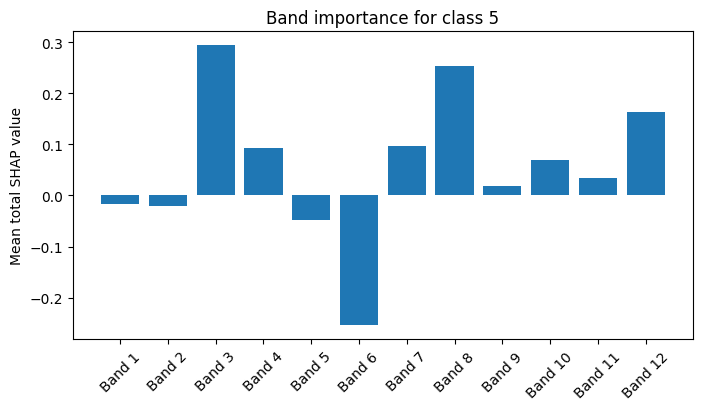

In [ ]:
# Import thư viện
import torch
import torch.nn as nn
import shap
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from tqdm import tqdm
import timm
import random

# model_path = "/content/drive/MyDrive/my_pytorch_model_bigearth_1.pth"
# Chọn device: ưu tiên GPU nếu có
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model = torch.load(model_path, map_location=device, weights_only=False)
# model.eval()
# print("Model loaded and moved to", device)

# Wrapper model cho 1 class
class_idx = 5  # Thay class bạn muốn xem (0-18)
class MultiLabelModel(nn.Module):
    def __init__(self, base_model, class_idx):
        super().__init__()
        self.base_model = base_model
        self.class_idx = class_idx

    def forward(self, x):
        logits = torch.sigmoid(self.base_model(x))
        return logits[:, self.class_idx].unsqueeze(-1)  # shape (batch, 1)

class_model = MultiLabelModel(model, class_idx).to(device)

# Background & test images
background_imgs = []
num_needed = 150  # số lượng background cần lấy

for imgs, labels in test_loader:
    # labels shape: (batch_size, num_classes)
    # Kiểm tra xem ảnh nào trong batch có chứa class_idx (=1, kh chứa là =0)
    mask = labels[:, class_idx] == 0  # multi-label binary
    selected_imgs = imgs[mask]

    # Thêm các ảnh có chứa class_idx vào danh sách
    background_imgs.append(selected_imgs)

    # Kiểm tra đã đủ số lượng chưa
    total_found = sum(img.shape[0] for img in background_imgs)
    if total_found >= num_needed:
        break
# Nối lại thành tensor
background_imgs = torch.cat(background_imgs, dim=0)[:num_needed].to(device)

# Danh sách lưu index các ảnh mà model dự đoán có class_i
predicted_indices = []

# Số lượng ảnh muốn explain
num_explain = 1000

print(f"Đang tìm {num_explain} ảnh mà model dự đoán có class {class_idx}...")

for idx in range(len(test_dataset)):
    img, _ = test_dataset[idx]
    img_batch = img.unsqueeze(0).to(device)  # thêm batch dim

    with torch.no_grad():
        prob = model(img_batch)[0, class_idx].item()
        pred = int(prob > 0.5)

    # Nếu model dự đoán class_i → thêm vào danh sách
    if pred == 1:
        predicted_indices.append(idx)
        print(f"Found at index {idx} (prob={prob:.3f})")

    # Dừng khi đủ số lượng
    if len(predicted_indices) >= num_explain:
        print(f"Đã tìm đủ {num_explain} ảnh.")
        break

# Kiểm tra nếu không đủ số lượng
if len(predicted_indices) < num_explain:
    # raise ValueError(f"Chỉ tìm được {len(predicted_indices)} ảnh, không đủ {num_explain} để explain.")
    print(f"⚠️ Chỉ tìm được {len(predicted_indices)} ảnh, sẽ tiếp tục với số lượng này.")

# Lấy các ảnh và labels để explain
test_imgs_list, test_labels_list = [], []
for idx in predicted_indices:
    img, label = test_dataset[idx]
    test_imgs_list.append(img.unsqueeze(0))  # thêm batch dim
    test_labels_list.append(label)

# Stack thành batch (num_explain, C, H, W)
test_imgs = torch.cat(test_imgs_list, dim=0).to(device)
test_labels = torch.stack(test_labels_list)

with torch.no_grad():
    probs = model(test_imgs)
    preds = (probs > 0.5).int()

# Hiển thị thông tin từng ảnh
for i in range(num_explain):
    print(f"Ảnh {i+1}:")
    print("  True labels:    ", test_labels_list[i].numpy())
    print("  Predicted probs:", np.round(probs[i].cpu().numpy(), 3))
    print("  Predicted labels:", preds[i].cpu().numpy())
    print(f"  Class {class_idx} probability: {probs[i, class_idx].item():.4f}\n")

# GradientExplainer
explainer = shap.GradientExplainer(class_model, background_imgs)

# Tính SHAP values
print(f"Calculating SHAP for class {class_idx} ...")
shap_values = explainer.shap_values(test_imgs)

print(shap_values.shape)  # (10, 12, 224, 224, 1)
shap_array = np.squeeze(shap_values)  # shape (10, 12, 224, 224)
print("shap_array shape:", shap_array.shape)

# Tổng SHAP theo từng band trên mỗi ảnh
total_shap = shap_array.sum(axis=(2, 3))  # shape (10, 12)

# Trung bình trên toàn bộ ảnh
mean_total_signed = total_shap.mean(axis=0)  # shape (12,)
print("mean_total_signed shape:", mean_total_signed.shape)

# Vẽ bar chart
plt.figure(figsize=(8, 4))
plt.bar(np.arange(1, 13), mean_total_signed)
plt.xticks(np.arange(1, 13), [f'Band {i}' for i in range(1, 13)], rotation=45)
plt.ylabel('Mean total SHAP value')
plt.title(f'Band importance for class {class_idx}')
plt.show()

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
  Class 6 probability: 2.0057

Ảnh 121:
  True labels:     [1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  Predicted probs: [  0.849  -4.785 -10.062  -1.347   6.63    0.305   1.043  -1.793  -3.089
  -7.11  -24.824 -13.99   -2.987  -8.173 -12.757 -10.52   -8.35  -21.99
 -34.898]
  Predicted labels: [1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
  Class 6 probability: 1.0434

Ảnh 122:
  True labels:     [0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0.]
  Predicted probs: [ -1.867  -5.46   -5.524  -2.542  -3.46   -1.058   0.941  -2.803   3.831
  -6.468 -10.583  -2.497   2.585  -8.328  -2.112  -4.384  -3.296  -7.881
 -10.987]
  Predicted labels: [0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0]
  Class 6 probability: 0.9411

Ảnh 123:
  True labels:     [0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  Predicted probs: [ -1.75   -1.44    4.426  -3.049  -6.177  -1.771   0.763   0.816  -1.673
  -7.074 -14.701 -13.187  -8

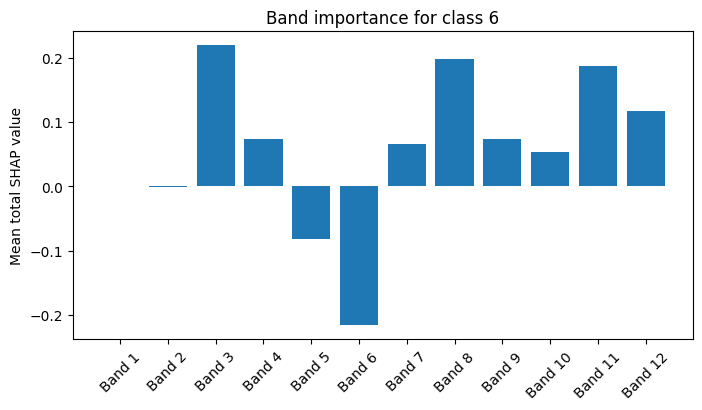

In [ ]:
# Import thư viện
import torch
import torch.nn as nn
import shap
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from tqdm import tqdm
import timm
import random

# model_path = "/content/drive/MyDrive/my_pytorch_model_bigearth_1.pth"
# Chọn device: ưu tiên GPU nếu có
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model = torch.load(model_path, map_location=device, weights_only=False)
# model.eval()
# print("Model loaded and moved to", device)

# Wrapper model cho 1 class
class_idx = 6  # Thay class bạn muốn xem (0-18)
class MultiLabelModel(nn.Module):
    def __init__(self, base_model, class_idx):
        super().__init__()
        self.base_model = base_model
        self.class_idx = class_idx

    def forward(self, x):
        logits = torch.sigmoid(self.base_model(x))
        return logits[:, self.class_idx].unsqueeze(-1)  # shape (batch, 1)

class_model = MultiLabelModel(model, class_idx).to(device)

# Background & test images
background_imgs = []
num_needed = 150  # số lượng background cần lấy

for imgs, labels in test_loader:
    # labels shape: (batch_size, num_classes)
    # Kiểm tra xem ảnh nào trong batch có chứa class_idx (=1, kh chứa là =0)
    mask = labels[:, class_idx] == 0  # multi-label binary
    selected_imgs = imgs[mask]

    # Thêm các ảnh có chứa class_idx vào danh sách
    background_imgs.append(selected_imgs)

    # Kiểm tra đã đủ số lượng chưa
    total_found = sum(img.shape[0] for img in background_imgs)
    if total_found >= num_needed:
        break
# Nối lại thành tensor
background_imgs = torch.cat(background_imgs, dim=0)[:num_needed].to(device)

# Danh sách lưu index các ảnh mà model dự đoán có class_i
predicted_indices = []

# Số lượng ảnh muốn explain
num_explain = 1000

print(f"Đang tìm {num_explain} ảnh mà model dự đoán có class {class_idx}...")

for idx in range(len(test_dataset)):
    img, _ = test_dataset[idx]
    img_batch = img.unsqueeze(0).to(device)  # thêm batch dim

    with torch.no_grad():
        prob = model(img_batch)[0, class_idx].item()
        pred = int(prob > 0.5)

    # Nếu model dự đoán class_i → thêm vào danh sách
    if pred == 1:
        predicted_indices.append(idx)
        print(f"Found at index {idx} (prob={prob:.3f})")

    # Dừng khi đủ số lượng
    if len(predicted_indices) >= num_explain:
        print(f"Đã tìm đủ {num_explain} ảnh.")
        break

# Kiểm tra nếu không đủ số lượng
if len(predicted_indices) < num_explain:
    print(f"Chỉ tìm được {len(predicted_indices)} ảnh, sẽ tiếp tục với số lượng này.")
    num_explain = len(predicted_indices)  # Cập nhật lại số lượng thực tế

# Lấy các ảnh và labels để explain
test_imgs_list, test_labels_list = [], []
for idx in predicted_indices:
    img, label = test_dataset[idx]
    test_imgs_list.append(img.unsqueeze(0))  # thêm batch dim
    test_labels_list.append(label)

# Stack thành batch (num_explain, C, H, W)
test_imgs = torch.cat(test_imgs_list, dim=0).to(device)
test_labels = torch.stack(test_labels_list)

with torch.no_grad():
    probs = model(test_imgs)
    preds = (probs > 0.5).int()

# Hiển thị thông tin từng ảnh
for i in range(num_explain):
    print(f"Ảnh {i+1}:")
    print("  True labels:    ", test_labels_list[i].numpy())
    print("  Predicted probs:", np.round(probs[i].cpu().numpy(), 3))
    print("  Predicted labels:", preds[i].cpu().numpy())
    print(f"  Class {class_idx} probability: {probs[i, class_idx].item():.4f}\n")

# GradientExplainer
explainer = shap.GradientExplainer(class_model, background_imgs)

# Tính SHAP values
print(f"Calculating SHAP for class {class_idx} ...")
shap_values = explainer.shap_values(test_imgs)

print(shap_values.shape)  # (10, 12, 224, 224, 1)
shap_array = np.squeeze(shap_values)  # shape (10, 12, 224, 224)
print("shap_array shape:", shap_array.shape)

# Tổng SHAP theo từng band trên mỗi ảnh
total_shap = shap_array.sum(axis=(2, 3))  # shape (10, 12)

# Trung bình trên toàn bộ ảnh
mean_total_signed = total_shap.mean(axis=0)  # shape (12,)
print("mean_total_signed shape:", mean_total_signed.shape)

# Vẽ bar chart
plt.figure(figsize=(8, 4))
plt.bar(np.arange(1, 13), mean_total_signed)
plt.xticks(np.arange(1, 13), [f'Band {i}' for i in range(1, 13)], rotation=45)
plt.ylabel('Mean total SHAP value')
plt.title(f'Band importance for class {class_idx}')
plt.show()

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
  -9.546]
  Predicted labels: [0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0]
  Class 7 probability: 7.6347

Ảnh 377:
  True labels:     [0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  Predicted probs: [ -0.507  -2.459  -2.418  -3.191  -2.457  -2.563  -2.082   7.913  -2.742
  -5.614  -9.267 -14.866  -9.393  -4.668  -7.11   -7.782  -4.908  -7.697
  -8.4  ]
  Predicted labels: [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
  Class 7 probability: 7.9127

Ảnh 378:
  True labels:     [1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  Predicted probs: [  2.176  -5.376  -3.878  -4.154  -5.167  -4.298  -1.985   6.802  -3.474
  -7.681  -9.788 -15.218  -8.311  -6.395  -8.854  -8.759  -5.95   -9.082
  -8.602]
  Predicted labels: [1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
  Class 7 probability: 6.8020

Ảnh 379:
  True labels:     [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  Predicted probs: [ -3.857  -4.053  -3.234  -4.6

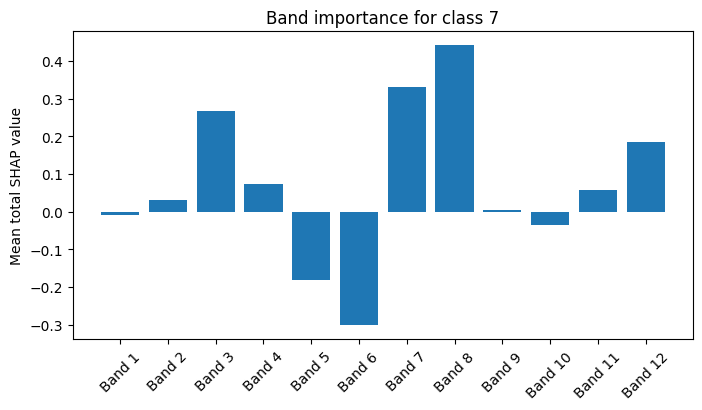

In [ ]:
# Import thư viện
import torch
import torch.nn as nn
import shap
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from tqdm import tqdm
import timm
import random

# model_path = "/content/drive/MyDrive/my_pytorch_model_bigearth_1.pth"
# Chọn device: ưu tiên GPU nếu có
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model = torch.load(model_path, map_location=device, weights_only=False)
# model.eval()
# print("Model loaded and moved to", device)

# Wrapper model cho 1 class
class_idx = 7  # Thay class bạn muốn xem (0-18)
class MultiLabelModel(nn.Module):
    def __init__(self, base_model, class_idx):
        super().__init__()
        self.base_model = base_model
        self.class_idx = class_idx

    def forward(self, x):
        logits = torch.sigmoid(self.base_model(x))
        return logits[:, self.class_idx].unsqueeze(-1)  # shape (batch, 1)

class_model = MultiLabelModel(model, class_idx).to(device)

# Background & test images
background_imgs = []
num_needed = 150  # số lượng background cần lấy

for imgs, labels in test_loader:
    # labels shape: (batch_size, num_classes)
    # Kiểm tra xem ảnh nào trong batch có chứa class_idx (=1, kh chứa là =0)
    mask = labels[:, class_idx] == 0  # multi-label binary
    selected_imgs = imgs[mask]

    # Thêm các ảnh có chứa class_idx vào danh sách
    background_imgs.append(selected_imgs)

    # Kiểm tra đã đủ số lượng chưa
    total_found = sum(img.shape[0] for img in background_imgs)
    if total_found >= num_needed:
        break
# Nối lại thành tensor
background_imgs = torch.cat(background_imgs, dim=0)[:num_needed].to(device)

# Danh sách lưu index các ảnh mà model dự đoán có class_i
predicted_indices = []

# Số lượng ảnh muốn explain
num_explain = 1000

print(f"🔎 Đang tìm {num_explain} ảnh mà model dự đoán có class {class_idx}...")

for idx in range(len(test_dataset)):
    img, _ = test_dataset[idx]
    img_batch = img.unsqueeze(0).to(device)  # thêm batch dim

    with torch.no_grad():
        prob = model(img_batch)[0, class_idx].item()
        pred = int(prob > 0.5)

    # Nếu model dự đoán class_i → thêm vào danh sách
    if pred == 1:
        predicted_indices.append(idx)
        print(f"Found at index {idx} (prob={prob:.3f})")

    # Dừng khi đủ số lượng
    if len(predicted_indices) >= num_explain:
        print(f"Đã tìm đủ {num_explain} ảnh.")
        break

# Kiểm tra nếu không đủ số lượng
if len(predicted_indices) < num_explain:
    print(f"⚠️ Chỉ tìm được {len(predicted_indices)} ảnh, sẽ tiếp tục với số lượng này.")
    num_explain = len(predicted_indices)  # ✅ Cập nhật lại số lượng thực tế

# Lấy các ảnh và labels để explain
test_imgs_list, test_labels_list = [], []
for idx in predicted_indices:
    img, label = test_dataset[idx]
    test_imgs_list.append(img.unsqueeze(0))  # thêm batch dim
    test_labels_list.append(label)

# Stack thành batch (num_explain, C, H, W)
test_imgs = torch.cat(test_imgs_list, dim=0).to(device)
test_labels = torch.stack(test_labels_list)

with torch.no_grad():
    probs = model(test_imgs)
    preds = (probs > 0.5).int()

# Hiển thị thông tin từng ảnh
for i in range(num_explain):
    print(f"Ảnh {i+1}:")
    print("  True labels:    ", test_labels_list[i].numpy())
    print("  Predicted probs:", np.round(probs[i].cpu().numpy(), 3))
    print("  Predicted labels:", preds[i].cpu().numpy())
    print(f"  Class {class_idx} probability: {probs[i, class_idx].item():.4f}\n")

# GradientExplainer
explainer = shap.GradientExplainer(class_model, background_imgs)

# Tính SHAP values
print(f"Calculating SHAP for class {class_idx} ...")
shap_values = explainer.shap_values(test_imgs)

print(shap_values.shape)  # (10, 12, 224, 224, 1)
shap_array = np.squeeze(shap_values)  # shape (10, 12, 224, 224)
print("shap_array shape:", shap_array.shape)

# Tổng SHAP theo từng band trên mỗi ảnh
total_shap = shap_array.sum(axis=(2, 3))  # shape (10, 12)

# Trung bình trên toàn bộ ảnh
mean_total_signed = total_shap.mean(axis=0)  # shape (12,)
print("mean_total_signed shape:", mean_total_signed.shape)

# Vẽ bar chart
plt.figure(figsize=(8, 4))
plt.bar(np.arange(1, 13), mean_total_signed)
plt.xticks(np.arange(1, 13), [f'Band {i}' for i in range(1, 13)], rotation=45)
plt.ylabel('Mean total SHAP value')
plt.title(f'Band importance for class {class_idx}')
plt.show()

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
  Class 8 probability: 2.9949

Ảnh 374:
  True labels:     [1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  Predicted probs: [  6.946  -5.61   -7.105  -6.595  -4.295  -1.768  -2.259  -5.727   6.591
  -6.463 -15.52  -10.474  -2.879  -7.304 -11.11   -9.561  -2.897 -14.869
 -17.04 ]
  Predicted labels: [1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
  Class 8 probability: 6.5914

Ảnh 375:
  True labels:     [0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  Predicted probs: [ 1.5190e+00  2.5340e+00 -3.2590e+00 -4.5960e+00 -1.5000e-02 -1.7780e+00
 -6.7000e-02 -1.5210e+00  2.3500e+00 -6.3430e+00 -1.8990e+01 -1.2325e+01
 -3.4910e+00 -7.1590e+00 -9.9720e+00 -8.4220e+00 -5.0200e+00 -2.1319e+01
 -2.0761e+01]
  Predicted labels: [1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
  Class 8 probability: 2.3504

Ảnh 376:
  True labels:     [1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  Predicted probs: [  5.47   -4.066  -6.83

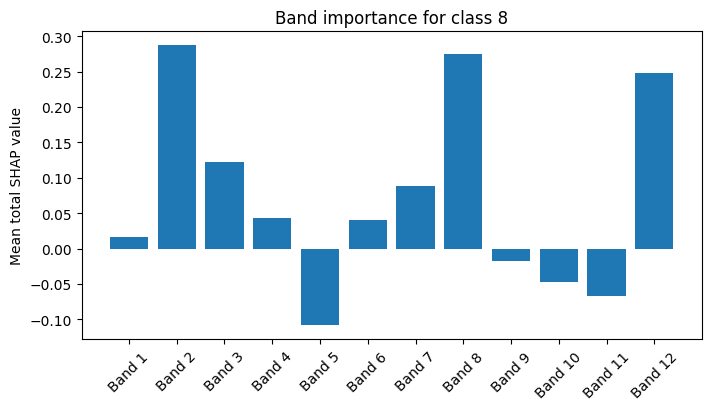

In [ ]:
# Import thư viện
import torch
import torch.nn as nn
import shap
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from tqdm import tqdm
import timm
import random

# model_path = "/content/drive/MyDrive/my_pytorch_model_bigearth_1.pth"
# Chọn device: ưu tiên GPU nếu có
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model = torch.load(model_path, map_location=device, weights_only=False)
# model.eval()
# print("Model loaded and moved to", device)

# Wrapper model cho 1 class
class_idx = 8  # Thay class bạn muốn xem (0-18)
class MultiLabelModel(nn.Module):
    def __init__(self, base_model, class_idx):
        super().__init__()
        self.base_model = base_model
        self.class_idx = class_idx

    def forward(self, x):
        logits = torch.sigmoid(self.base_model(x))
        return logits[:, self.class_idx].unsqueeze(-1)  # shape (batch, 1)

class_model = MultiLabelModel(model, class_idx).to(device)

# Background & test images
background_imgs = []
num_needed = 150  # số lượng background cần lấy

for imgs, labels in test_loader:
    # labels shape: (batch_size, num_classes)
    # Kiểm tra xem ảnh nào trong batch có chứa class_idx (=1, kh chứa là =0)
    mask = labels[:, class_idx] == 0  # multi-label binary
    selected_imgs = imgs[mask]

    # Thêm các ảnh có chứa class_idx vào danh sách
    background_imgs.append(selected_imgs)

    # Kiểm tra đã đủ số lượng chưa
    total_found = sum(img.shape[0] for img in background_imgs)
    if total_found >= num_needed:
        break
# Nối lại thành tensor
background_imgs = torch.cat(background_imgs, dim=0)[:num_needed].to(device)

# Danh sách lưu index các ảnh mà model dự đoán có class_i
predicted_indices = []

# Số lượng ảnh muốn explain
num_explain = 1000

print(f"Đang tìm {num_explain} ảnh mà model dự đoán có class {class_idx}...")

for idx in range(len(test_dataset)):
    img, _ = test_dataset[idx]
    img_batch = img.unsqueeze(0).to(device)  # thêm batch dim

    with torch.no_grad():
        prob = model(img_batch)[0, class_idx].item()
        pred = int(prob > 0.5)

    # Nếu model dự đoán class_i → thêm vào danh sách
    if pred == 1:
        predicted_indices.append(idx)
        print(f"Found at index {idx} (prob={prob:.3f})")

    # Dừng khi đủ số lượng
    if len(predicted_indices) >= num_explain:
        print(f"Đã tìm đủ {num_explain} ảnh.")
        break

# Kiểm tra nếu không đủ số lượng
if len(predicted_indices) < num_explain:
    print(f"Chỉ tìm được {len(predicted_indices)} ảnh, sẽ tiếp tục với số lượng này.")
    num_explain = len(predicted_indices)  # Cập nhật lại số lượng thực tế

# Lấy các ảnh và labels để explain
test_imgs_list, test_labels_list = [], []
for idx in predicted_indices:
    img, label = test_dataset[idx]
    test_imgs_list.append(img.unsqueeze(0))  # thêm batch dim
    test_labels_list.append(label)

# ✅ Stack thành batch (num_explain, C, H, W)
test_imgs = torch.cat(test_imgs_list, dim=0).to(device)
test_labels = torch.stack(test_labels_list)

with torch.no_grad():
    probs = model(test_imgs)
    preds = (probs > 0.5).int()

# Hiển thị thông tin từng ảnh
for i in range(num_explain):
    print(f"Ảnh {i+1}:")
    print("  True labels:    ", test_labels_list[i].numpy())
    print("  Predicted probs:", np.round(probs[i].cpu().numpy(), 3))
    print("  Predicted labels:", preds[i].cpu().numpy())
    print(f"  Class {class_idx} probability: {probs[i, class_idx].item():.4f}\n")

# GradientExplainer
explainer = shap.GradientExplainer(class_model, background_imgs)

# Tính SHAP values
print(f"Calculating SHAP for class {class_idx} ...")
shap_values = explainer.shap_values(test_imgs)

print(shap_values.shape)  # (10, 12, 224, 224, 1)
shap_array = np.squeeze(shap_values)  # shape (10, 12, 224, 224)
print("shap_array shape:", shap_array.shape)

# Tổng SHAP theo từng band trên mỗi ảnh
total_shap = shap_array.sum(axis=(2, 3))  # shape (10, 12)

# Trung bình trên toàn bộ ảnh
mean_total_signed = total_shap.mean(axis=0)  # shape (12,)
print("mean_total_signed shape:", mean_total_signed.shape)

# Vẽ bar chart
plt.figure(figsize=(8, 4))
plt.bar(np.arange(1, 13), mean_total_signed)
plt.xticks(np.arange(1, 13), [f'Band {i}' for i in range(1, 13)], rotation=45)
plt.ylabel('Mean total SHAP value')
plt.title(f'Band importance for class {class_idx}')
plt.show()

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
  True labels:     [0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  Predicted probs: [ -3.413   2.327  -1.019  -2.502  -0.661  -1.573  -7.771  -6.7    -3.626
   7.6   -10.71  -14.253 -11.352  -3.887 -13.143 -12.871  -4.357 -15.131
 -17.674]
  Predicted labels: [0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
  Class 9 probability: 7.6001

Ảnh 377:
  True labels:     [0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
  Predicted probs: [ -1.264  -4.585  -5.898  -0.463   1.542  -0.93   -0.44   -2.02    8.05
   5.381  -9.708 -11.338  -3.63   -0.886  -8.52   -9.775  -1.712 -12.686
 -17.475]
  Predicted labels: [0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0]
  Class 9 probability: 5.3808

Ảnh 378:
  True labels:     [0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  Predicted probs: [ -4.983   0.853   0.51   -3.275  -3.364  -3.258 -10.758  -9.382  -5.252
   8.412  -9.286 -10.925 -14.083  -4.408 -13.598 -15.775  -6.515 -17

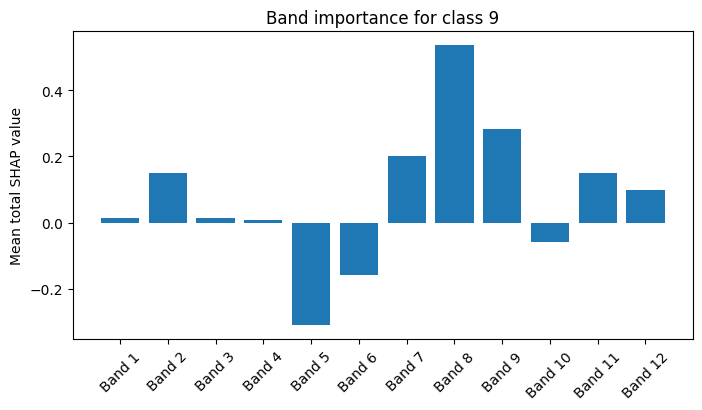

In [ ]:
# Import thư viện
import torch
import torch.nn as nn
import shap
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from tqdm import tqdm
import timm
import random

# model_path = "/content/drive/MyDrive/my_pytorch_model_bigearth_1.pth"
# 🔥 Chọn device: ưu tiên GPU nếu có
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model = torch.load(model_path, map_location=device, weights_only=False)
# model.eval()
# print("Model loaded and moved to", device)

# Wrapper model cho 1 class
class_idx = 9  # Thay class bạn muốn xem (0-18)
class MultiLabelModel(nn.Module):
    def __init__(self, base_model, class_idx):
        super().__init__()
        self.base_model = base_model
        self.class_idx = class_idx

    def forward(self, x):
        logits = torch.sigmoid(self.base_model(x))
        return logits[:, self.class_idx].unsqueeze(-1)  # shape (batch, 1)

class_model = MultiLabelModel(model, class_idx).to(device)

# Background & test images
background_imgs = []
num_needed = 150  # số lượng background cần lấy

for imgs, labels in test_loader:
    # labels shape: (batch_size, num_classes)
    # Kiểm tra xem ảnh nào trong batch có chứa class_idx (=1, kh chứa là =0)
    mask = labels[:, class_idx] == 0  # multi-label binary
    selected_imgs = imgs[mask]

    # Thêm các ảnh có chứa class_idx vào danh sách
    background_imgs.append(selected_imgs)

    # Kiểm tra đã đủ số lượng chưa
    total_found = sum(img.shape[0] for img in background_imgs)
    if total_found >= num_needed:
        break
# Nối lại thành tensor
background_imgs = torch.cat(background_imgs, dim=0)[:num_needed].to(device)

# ✅ Danh sách lưu index các ảnh mà model dự đoán có class_i
predicted_indices = []

# ✅ Số lượng ảnh muốn explain
num_explain = 1000

print(f"🔎 Đang tìm {num_explain} ảnh mà model dự đoán có class {class_idx}...")

for idx in range(len(test_dataset)):
    img, _ = test_dataset[idx]
    img_batch = img.unsqueeze(0).to(device)  # thêm batch dim

    with torch.no_grad():
        prob = model(img_batch)[0, class_idx].item()
        pred = int(prob > 0.5)

    # Nếu model dự đoán class_i → thêm vào danh sách
    if pred == 1:
        predicted_indices.append(idx)
        print(f"✅ Found at index {idx} (prob={prob:.3f})")

    # ✅ Dừng khi đủ số lượng
    if len(predicted_indices) >= num_explain:
        print(f"🎯 Đã tìm đủ {num_explain} ảnh.")
        break

# 🚨 Kiểm tra nếu không đủ số lượng
if len(predicted_indices) < num_explain:
    print(f"⚠️ Chỉ tìm được {len(predicted_indices)} ảnh, sẽ tiếp tục với số lượng này.")
    num_explain = len(predicted_indices)  # ✅ Cập nhật lại số lượng thực tế

# ✅ Lấy các ảnh và labels để explain
test_imgs_list, test_labels_list = [], []
for idx in predicted_indices:
    img, label = test_dataset[idx]
    test_imgs_list.append(img.unsqueeze(0))  # thêm batch dim
    test_labels_list.append(label)

# ✅ Stack thành batch (num_explain, C, H, W)
test_imgs = torch.cat(test_imgs_list, dim=0).to(device)
test_labels = torch.stack(test_labels_list)

with torch.no_grad():
    probs = model(test_imgs)
    preds = (probs > 0.5).int()

# Hiển thị thông tin từng ảnh
for i in range(num_explain):
    print(f"Ảnh {i+1}:")
    print("  True labels:    ", test_labels_list[i].numpy())
    print("  Predicted probs:", np.round(probs[i].cpu().numpy(), 3))
    print("  Predicted labels:", preds[i].cpu().numpy())
    print(f"  Class {class_idx} probability: {probs[i, class_idx].item():.4f}\n")

# GradientExplainer
explainer = shap.GradientExplainer(class_model, background_imgs)

# Tính SHAP values
print(f"Calculating SHAP for class {class_idx} ...")
shap_values = explainer.shap_values(test_imgs)

print(shap_values.shape)  # (10, 12, 224, 224, 1)
shap_array = np.squeeze(shap_values)  # shape (10, 12, 224, 224)
print("shap_array shape:", shap_array.shape)

# Tổng SHAP theo từng band trên mỗi ảnh
total_shap = shap_array.sum(axis=(2, 3))  # shape (10, 12)

# Trung bình trên toàn bộ ảnh
mean_total_signed = total_shap.mean(axis=0)  # shape (12,)
print("mean_total_signed shape:", mean_total_signed.shape)

# Vẽ bar chart
plt.figure(figsize=(8, 4))
plt.bar(np.arange(1, 13), mean_total_signed)
plt.xticks(np.arange(1, 13), [f'Band {i}' for i in range(1, 13)], rotation=45)
plt.ylabel('Mean total SHAP value')
plt.title(f'Band importance for class {class_idx}')
plt.show()

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
  Predicted probs: [-29.833 -14.642 -17.066 -21.258 -20.789 -22.846 -26.672 -28.611 -25.114
 -12.581  14.112 -29.966 -33.388 -33.021 -22.367 -32.042 -32.438 -27.274
 -24.295]
  Predicted labels: [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
  Class 10 probability: 14.1118

Ảnh 375:
  True labels:     [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
  Predicted probs: [-27.543 -14.74  -17.101 -19.642 -19.141 -21.349 -24.607 -26.179 -23.909
 -11.529  12.651 -26.973 -30.822 -31.425 -20.556 -29.704 -30.568 -25.535
 -23.081]
  Predicted labels: [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
  Class 10 probability: 12.6509

Ảnh 376:
  True labels:     [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
  Predicted probs: [-26.803 -14.332 -16.449 -19.486 -19.355 -20.776 -23.988 -25.395 -22.736
 -11.007  12.165 -27.095 -30.021 -29.053 -19.795 -28.494 -29.348 -24.431
 -21.486]
  Predicted labels: [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0

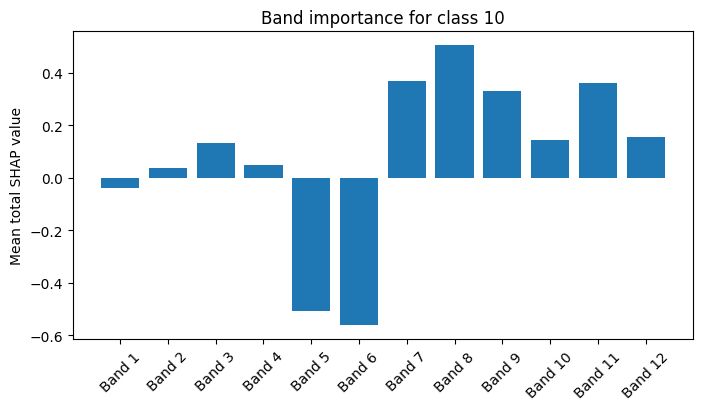

In [ ]:
# Import thư viện
import torch
import torch.nn as nn
import shap
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from tqdm import tqdm
import timm
import random

# model_path = "/content/drive/MyDrive/my_pytorch_model_bigearth_1.pth"
# 🔥 Chọn device: ưu tiên GPU nếu có
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model = torch.load(model_path, map_location=device, weights_only=False)
# model.eval()
# print("Model loaded and moved to", device)

# Wrapper model cho 1 class
class_idx = 10  # Thay class bạn muốn xem (0-18)
class MultiLabelModel(nn.Module):
    def __init__(self, base_model, class_idx):
        super().__init__()
        self.base_model = base_model
        self.class_idx = class_idx

    def forward(self, x):
        logits = torch.sigmoid(self.base_model(x))
        return logits[:, self.class_idx].unsqueeze(-1)  # shape (batch, 1)

class_model = MultiLabelModel(model, class_idx).to(device)

# Background & test images
background_imgs = []
num_needed = 150  # số lượng background cần lấy

for imgs, labels in test_loader:
    # labels shape: (batch_size, num_classes)
    # Kiểm tra xem ảnh nào trong batch có chứa class_idx (=1, kh chứa là =0)
    mask = labels[:, class_idx] == 0  # multi-label binary
    selected_imgs = imgs[mask]

    # Thêm các ảnh có chứa class_idx vào danh sách
    background_imgs.append(selected_imgs)

    # Kiểm tra đã đủ số lượng chưa
    total_found = sum(img.shape[0] for img in background_imgs)
    if total_found >= num_needed:
        break
# Nối lại thành tensor
background_imgs = torch.cat(background_imgs, dim=0)[:num_needed].to(device)

# ✅ Danh sách lưu index các ảnh mà model dự đoán có class_i
predicted_indices = []

# ✅ Số lượng ảnh muốn explain
num_explain = 1000

print(f"🔎 Đang tìm {num_explain} ảnh mà model dự đoán có class {class_idx}...")

for idx in range(len(test_dataset)):
    img, _ = test_dataset[idx]
    img_batch = img.unsqueeze(0).to(device)  # thêm batch dim

    with torch.no_grad():
        prob = model(img_batch)[0, class_idx].item()
        pred = int(prob > 0.5)

    # Nếu model dự đoán class_i → thêm vào danh sách
    if pred == 1:
        predicted_indices.append(idx)
        print(f"✅ Found at index {idx} (prob={prob:.3f})")

    # ✅ Dừng khi đủ số lượng
    if len(predicted_indices) >= num_explain:
        print(f"🎯 Đã tìm đủ {num_explain} ảnh.")
        break

# 🚨 Kiểm tra nếu không đủ số lượng
if len(predicted_indices) < num_explain:
    print(f"⚠️ Chỉ tìm được {len(predicted_indices)} ảnh, sẽ tiếp tục với số lượng này.")
    num_explain = len(predicted_indices)  # ✅ Cập nhật lại số lượng thực tế

# ✅ Lấy các ảnh và labels để explain
test_imgs_list, test_labels_list = [], []
for idx in predicted_indices:
    img, label = test_dataset[idx]
    test_imgs_list.append(img.unsqueeze(0))  # thêm batch dim
    test_labels_list.append(label)

# ✅ Stack thành batch (num_explain, C, H, W)
test_imgs = torch.cat(test_imgs_list, dim=0).to(device)
test_labels = torch.stack(test_labels_list)

with torch.no_grad():
    probs = model(test_imgs)
    preds = (probs > 0.5).int()

# Hiển thị thông tin từng ảnh
for i in range(num_explain):
    print(f"Ảnh {i+1}:")
    print("  True labels:    ", test_labels_list[i].numpy())
    print("  Predicted probs:", np.round(probs[i].cpu().numpy(), 3))
    print("  Predicted labels:", preds[i].cpu().numpy())
    print(f"  Class {class_idx} probability: {probs[i, class_idx].item():.4f}\n")

# GradientExplainer
explainer = shap.GradientExplainer(class_model, background_imgs)

# Tính SHAP values
print(f"Calculating SHAP for class {class_idx} ...")
shap_values = explainer.shap_values(test_imgs)

print(shap_values.shape)  # (10, 12, 224, 224, 1)
shap_array = np.squeeze(shap_values)  # shape (10, 12, 224, 224)
print("shap_array shape:", shap_array.shape)

# Tổng SHAP theo từng band trên mỗi ảnh
total_shap = shap_array.sum(axis=(2, 3))  # shape (10, 12)

# Trung bình trên toàn bộ ảnh
mean_total_signed = total_shap.mean(axis=0)  # shape (12,)
print("mean_total_signed shape:", mean_total_signed.shape)

# Vẽ bar chart
plt.figure(figsize=(8, 4))
plt.bar(np.arange(1, 13), mean_total_signed)
plt.xticks(np.arange(1, 13), [f'Band {i}' for i in range(1, 13)], rotation=45)
plt.ylabel('Mean total SHAP value')
plt.title(f'Band importance for class {class_idx}')
plt.show()

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
  Predicted labels: [1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
  Class 11 probability: 1.5806

Ảnh 379:
  True labels:     [1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
  Predicted probs: [  0.259  -5.252  -4.624  -2.418  -2.366  -5.368  -2.718  -1.092  -5.516
  -3.993 -14.999   6.115  -2.744 -14.818  -6.741  -7.769  -7.853 -17.89
 -26.754]
  Predicted labels: [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
  Class 11 probability: 6.1151

Ảnh 380:
  True labels:     [0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
  Predicted probs: [ -1.193  -2.606  -3.491   0.316   1.565  -3.82   -2.899  -1.235  -7.956
  -5.61  -18.57    2.312  -2.128 -13.113  -5.551  -5.859  -7.168 -14.943
 -23.736]
  Predicted labels: [0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
  Class 11 probability: 2.3124

Ảnh 381:
  True labels:     [1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
  Predicted probs: [  2.849  -7.127  -5.073  -1.942  -2.9

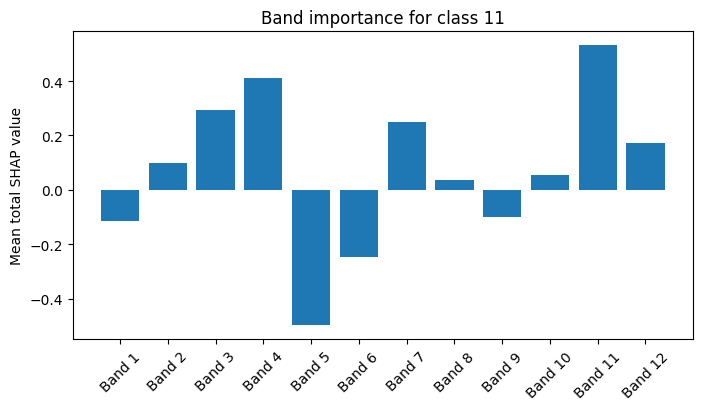

In [ ]:
# Import thư viện
import torch
import torch.nn as nn
import shap
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from tqdm import tqdm
import timm
import random

# model_path = "/content/drive/MyDrive/my_pytorch_model_bigearth_1.pth"
# 🔥 Chọn device: ưu tiên GPU nếu có
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model = torch.load(model_path, map_location=device, weights_only=False)
# model.eval()
# print("Model loaded and moved to", device)

# Wrapper model cho 1 class
class_idx = 11  # Thay class bạn muốn xem (0-18)
class MultiLabelModel(nn.Module):
    def __init__(self, base_model, class_idx):
        super().__init__()
        self.base_model = base_model
        self.class_idx = class_idx

    def forward(self, x):
        logits = torch.sigmoid(self.base_model(x))
        return logits[:, self.class_idx].unsqueeze(-1)  # shape (batch, 1)

class_model = MultiLabelModel(model, class_idx).to(device)

# Background & test images
background_imgs = []
num_needed = 150  # số lượng background cần lấy

for imgs, labels in test_loader:
    # labels shape: (batch_size, num_classes)
    # Kiểm tra xem ảnh nào trong batch có chứa class_idx (=1, kh chứa là =0)
    mask = labels[:, class_idx] == 0  # multi-label binary
    selected_imgs = imgs[mask]

    # Thêm các ảnh có chứa class_idx vào danh sách
    background_imgs.append(selected_imgs)

    # Kiểm tra đã đủ số lượng chưa
    total_found = sum(img.shape[0] for img in background_imgs)
    if total_found >= num_needed:
        break
# Nối lại thành tensor
background_imgs = torch.cat(background_imgs, dim=0)[:num_needed].to(device)

# ✅ Danh sách lưu index các ảnh mà model dự đoán có class_i
predicted_indices = []

# ✅ Số lượng ảnh muốn explain
num_explain = 1000

print(f"🔎 Đang tìm {num_explain} ảnh mà model dự đoán có class {class_idx}...")

for idx in range(len(test_dataset)):
    img, _ = test_dataset[idx]
    img_batch = img.unsqueeze(0).to(device)  # thêm batch dim

    with torch.no_grad():
        prob = model(img_batch)[0, class_idx].item()
        pred = int(prob > 0.5)

    # Nếu model dự đoán class_i → thêm vào danh sách
    if pred == 1:
        predicted_indices.append(idx)
        print(f"✅ Found at index {idx} (prob={prob:.3f})")

    # ✅ Dừng khi đủ số lượng
    if len(predicted_indices) >= num_explain:
        print(f"🎯 Đã tìm đủ {num_explain} ảnh.")
        break

# 🚨 Kiểm tra nếu không đủ số lượng
if len(predicted_indices) < num_explain:
    print(f"⚠️ Chỉ tìm được {len(predicted_indices)} ảnh, sẽ tiếp tục với số lượng này.")
    num_explain = len(predicted_indices)  # ✅ Cập nhật lại số lượng thực tế


# ✅ Lấy các ảnh và labels để explain
test_imgs_list, test_labels_list = [], []
for idx in predicted_indices:
    img, label = test_dataset[idx]
    test_imgs_list.append(img.unsqueeze(0))  # thêm batch dim
    test_labels_list.append(label)

# ✅ Stack thành batch (num_explain, C, H, W)
test_imgs = torch.cat(test_imgs_list, dim=0).to(device)
test_labels = torch.stack(test_labels_list)

with torch.no_grad():
    probs = model(test_imgs)
    preds = (probs > 0.5).int()

# Hiển thị thông tin từng ảnh
for i in range(num_explain):
    print(f"Ảnh {i+1}:")
    print("  True labels:    ", test_labels_list[i].numpy())
    print("  Predicted probs:", np.round(probs[i].cpu().numpy(), 3))
    print("  Predicted labels:", preds[i].cpu().numpy())
    print(f"  Class {class_idx} probability: {probs[i, class_idx].item():.4f}\n")

# GradientExplainer
explainer = shap.GradientExplainer(class_model, background_imgs)

# Tính SHAP values
print(f"Calculating SHAP for class {class_idx} ...")
shap_values = explainer.shap_values(test_imgs)

print(shap_values.shape)  # (10, 12, 224, 224, 1)
shap_array = np.squeeze(shap_values)  # shape (10, 12, 224, 224)
print("shap_array shape:", shap_array.shape)

# Tổng SHAP theo từng band trên mỗi ảnh
total_shap = shap_array.sum(axis=(2, 3))  # shape (10, 12)

# Trung bình trên toàn bộ ảnh
mean_total_signed = total_shap.mean(axis=0)  # shape (12,)
print("mean_total_signed shape:", mean_total_signed.shape)

# Vẽ bar chart
plt.figure(figsize=(8, 4))
plt.bar(np.arange(1, 13), mean_total_signed)
plt.xticks(np.arange(1, 13), [f'Band {i}' for i in range(1, 13)], rotation=45)
plt.ylabel('Mean total SHAP value')
plt.title(f'Band importance for class {class_idx}')
plt.show()

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
 -26.722]
  Predicted labels: [1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
  Class 12 probability: 4.2140

Ảnh 304:
  True labels:     [1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
  Predicted probs: [  3.746  -3.887  -6.116  -4.717  -1.319   0.305  -0.267  -4.848   1.759
  -7.709 -17.901  -8.65    3.144  -9.285  -5.858  -5.202  -4.097 -11.125
 -18.51 ]
  Predicted labels: [1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0]
  Class 12 probability: 3.1444

Ảnh 305:
  True labels:     [1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
  Predicted probs: [ 1.526 -0.304 -2.278 -0.881 -0.472  0.688  1.377 -3.535 -1.323 -6.295
 -9.99  -3.923  0.767 -7.471 -2.377 -4.054 -4.093 -6.036 -8.877]
  Predicted labels: [1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0]
  Class 12 probability: 0.7672

Ảnh 306:
  True labels:     [0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  Predicted probs: [-4.1830e+00  3.0000e-03 -2.0120e+00 -2.4100e-0

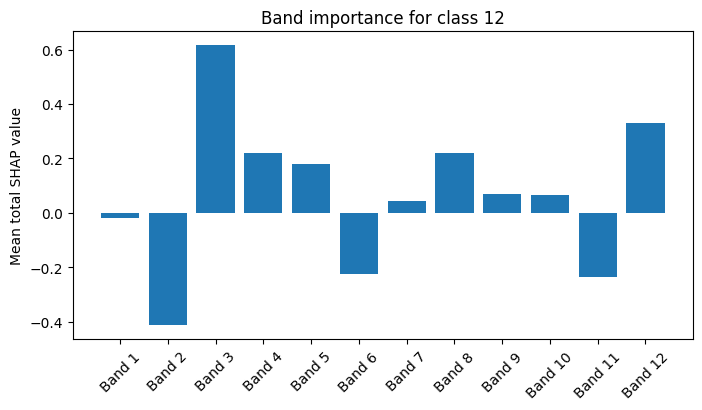

In [ ]:
# Import thư viện
import torch
import torch.nn as nn
import shap
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from tqdm import tqdm
import timm
import random

# model_path = "/content/drive/MyDrive/my_pytorch_model_bigearth_1.pth"
# 🔥 Chọn device: ưu tiên GPU nếu có
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model = torch.load(model_path, map_location=device, weights_only=False)
# model.eval()
# print("Model loaded and moved to", device)

# Wrapper model cho 1 class
class_idx = 12  # Thay class bạn muốn xem (0-18)
class MultiLabelModel(nn.Module):
    def __init__(self, base_model, class_idx):
        super().__init__()
        self.base_model = base_model
        self.class_idx = class_idx

    def forward(self, x):
        logits = torch.sigmoid(self.base_model(x))
        return logits[:, self.class_idx].unsqueeze(-1)  # shape (batch, 1)

class_model = MultiLabelModel(model, class_idx).to(device)

# Background & test images
background_imgs = []
num_needed = 150  # số lượng background cần lấy

for imgs, labels in test_loader:
    # labels shape: (batch_size, num_classes)
    # Kiểm tra xem ảnh nào trong batch có chứa class_idx (=1, kh chứa là =0)
    mask = labels[:, class_idx] == 0  # multi-label binary
    selected_imgs = imgs[mask]

    # Thêm các ảnh có chứa class_idx vào danh sách
    background_imgs.append(selected_imgs)

    # Kiểm tra đã đủ số lượng chưa
    total_found = sum(img.shape[0] for img in background_imgs)
    if total_found >= num_needed:
        break
# Nối lại thành tensor
background_imgs = torch.cat(background_imgs, dim=0)[:num_needed].to(device)

# ✅ Danh sách lưu index các ảnh mà model dự đoán có class_i
predicted_indices = []

# ✅ Số lượng ảnh muốn explain
num_explain = 1000

print(f"🔎 Đang tìm {num_explain} ảnh mà model dự đoán có class {class_idx}...")

for idx in range(len(test_dataset)):
    img, _ = test_dataset[idx]
    img_batch = img.unsqueeze(0).to(device)  # thêm batch dim

    with torch.no_grad():
        prob = model(img_batch)[0, class_idx].item()
        pred = int(prob > 0.5)

    # Nếu model dự đoán class_i → thêm vào danh sách
    if pred == 1:
        predicted_indices.append(idx)
        print(f"✅ Found at index {idx} (prob={prob:.3f})")

    # ✅ Dừng khi đủ số lượng
    if len(predicted_indices) >= num_explain:
        print(f"🎯 Đã tìm đủ {num_explain} ảnh.")
        break

# 🚨 Kiểm tra nếu không đủ số lượng
if len(predicted_indices) < num_explain:
    print(f"⚠️ Chỉ tìm được {len(predicted_indices)} ảnh, sẽ tiếp tục với số lượng này.")
    num_explain = len(predicted_indices)  # ✅ Cập nhật lại số lượng thực tế

# ✅ Lấy các ảnh và labels để explain
test_imgs_list, test_labels_list = [], []
for idx in predicted_indices:
    img, label = test_dataset[idx]
    test_imgs_list.append(img.unsqueeze(0))  # thêm batch dim
    test_labels_list.append(label)

# ✅ Stack thành batch (num_explain, C, H, W)
test_imgs = torch.cat(test_imgs_list, dim=0).to(device)
test_labels = torch.stack(test_labels_list)

with torch.no_grad():
    probs = model(test_imgs)
    preds = (probs > 0.5).int()

# Hiển thị thông tin từng ảnh
for i in range(num_explain):
    print(f"Ảnh {i+1}:")
    print("  True labels:    ", test_labels_list[i].numpy())
    print("  Predicted probs:", np.round(probs[i].cpu().numpy(), 3))
    print("  Predicted labels:", preds[i].cpu().numpy())
    print(f"  Class {class_idx} probability: {probs[i, class_idx].item():.4f}\n")

# GradientExplainer
explainer = shap.GradientExplainer(class_model, background_imgs)

# Tính SHAP values
print(f"Calculating SHAP for class {class_idx} ...")
shap_values = explainer.shap_values(test_imgs)

print(shap_values.shape)  # (10, 12, 224, 224, 1)
shap_array = np.squeeze(shap_values)  # shape (10, 12, 224, 224)
print("shap_array shape:", shap_array.shape)

# Tổng SHAP theo từng band trên mỗi ảnh
total_shap = shap_array.sum(axis=(2, 3))  # shape (10, 12)

# Trung bình trên toàn bộ ảnh
mean_total_signed = total_shap.mean(axis=0)  # shape (12,)
print("mean_total_signed shape:", mean_total_signed.shape)

# Vẽ bar chart
plt.figure(figsize=(8, 4))
plt.bar(np.arange(1, 13), mean_total_signed)
plt.xticks(np.arange(1, 13), [f'Band {i}' for i in range(1, 13)], rotation=45)
plt.ylabel('Mean total SHAP value')
plt.title(f'Band importance for class {class_idx}')
plt.show()

🔎 Đang tìm 1000 ảnh mà model dự đoán có class 13...
✅ Found at index 10 (prob=1.792)
✅ Found at index 13 (prob=0.508)
✅ Found at index 91 (prob=3.695)
✅ Found at index 186 (prob=1.411)
✅ Found at index 195 (prob=1.450)
✅ Found at index 198 (prob=2.427)
✅ Found at index 227 (prob=0.737)
✅ Found at index 254 (prob=1.926)
✅ Found at index 261 (prob=7.192)
✅ Found at index 271 (prob=3.434)
✅ Found at index 276 (prob=1.294)
✅ Found at index 343 (prob=3.539)
✅ Found at index 377 (prob=2.404)
✅ Found at index 439 (prob=8.497)
✅ Found at index 451 (prob=7.015)
✅ Found at index 476 (prob=0.711)
✅ Found at index 495 (prob=0.854)
✅ Found at index 528 (prob=2.054)
✅ Found at index 543 (prob=1.596)
✅ Found at index 560 (prob=1.557)
✅ Found at index 612 (prob=0.682)
✅ Found at index 631 (prob=1.956)
✅ Found at index 687 (prob=2.917)
✅ Found at index 749 (prob=5.976)
✅ Found at index 774 (prob=7.948)
✅ Found at index 845 (prob=2.082)
✅ Found at index 914 (prob=4.641)
✅ Found at index 939 (prob=0.883)

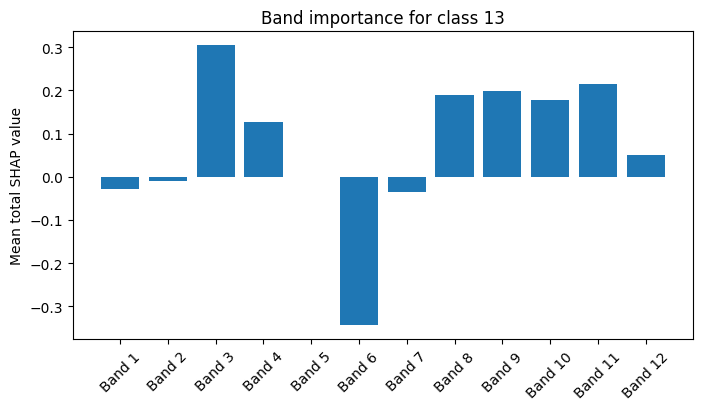

In [ ]:
# Import thư viện
import torch
import torch.nn as nn
import shap
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from tqdm import tqdm
import timm
import random

# model_path = "/content/drive/MyDrive/my_pytorch_model_bigearth_1.pth"
# 🔥 Chọn device: ưu tiên GPU nếu có
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model = torch.load(model_path, map_location=device, weights_only=False)
# model.eval()
# print("Model loaded and moved to", device)

# Wrapper model cho 1 class
class_idx = 13  # Thay class bạn muốn xem (0-18)
class MultiLabelModel(nn.Module):
    def __init__(self, base_model, class_idx):
        super().__init__()
        self.base_model = base_model
        self.class_idx = class_idx

    def forward(self, x):
        logits = torch.sigmoid(self.base_model(x))
        return logits[:, self.class_idx].unsqueeze(-1)  # shape (batch, 1)

class_model = MultiLabelModel(model, class_idx).to(device)

# Background & test images
background_imgs = []
num_needed = 150  # số lượng background cần lấy

for imgs, labels in test_loader:
    # labels shape: (batch_size, num_classes)
    # Kiểm tra xem ảnh nào trong batch có chứa class_idx (=1, kh chứa là =0)
    mask = labels[:, class_idx] == 0  # multi-label binary
    selected_imgs = imgs[mask]

    # Thêm các ảnh có chứa class_idx vào danh sách
    background_imgs.append(selected_imgs)

    # Kiểm tra đã đủ số lượng chưa
    total_found = sum(img.shape[0] for img in background_imgs)
    if total_found >= num_needed:
        break
# Nối lại thành tensor
background_imgs = torch.cat(background_imgs, dim=0)[:num_needed].to(device)

# ✅ Danh sách lưu index các ảnh mà model dự đoán có class_i
predicted_indices = []

# ✅ Số lượng ảnh muốn explain
num_explain = 1000

print(f"🔎 Đang tìm {num_explain} ảnh mà model dự đoán có class {class_idx}...")

for idx in range(len(test_dataset)):
    img, _ = test_dataset[idx]
    img_batch = img.unsqueeze(0).to(device)  # thêm batch dim

    with torch.no_grad():
        prob = model(img_batch)[0, class_idx].item()
        pred = int(prob > 0.5)

    # Nếu model dự đoán class_i → thêm vào danh sách
    if pred == 1:
        predicted_indices.append(idx)
        print(f"✅ Found at index {idx} (prob={prob:.3f})")

    # ✅ Dừng khi đủ số lượng
    if len(predicted_indices) >= num_explain:
        print(f"🎯 Đã tìm đủ {num_explain} ảnh.")
        break

# 🚨 Kiểm tra nếu không đủ số lượng
if len(predicted_indices) < num_explain:
    print(f"⚠️ Chỉ tìm được {len(predicted_indices)} ảnh, sẽ tiếp tục với số lượng này.")
    num_explain = len(predicted_indices)  # ✅ Cập nhật lại số lượng thực tế


# ✅ Lấy các ảnh và labels để explain
test_imgs_list, test_labels_list = [], []
for idx in predicted_indices:
    img, label = test_dataset[idx]
    test_imgs_list.append(img.unsqueeze(0))  # thêm batch dim
    test_labels_list.append(label)

# ✅ Stack thành batch (num_explain, C, H, W)
test_imgs = torch.cat(test_imgs_list, dim=0).to(device)
test_labels = torch.stack(test_labels_list)

with torch.no_grad():
    probs = model(test_imgs)
    preds = (probs > 0.5).int()

# Hiển thị thông tin từng ảnh
for i in range(num_explain):
    print(f"Ảnh {i+1}:")
    print("  True labels:    ", test_labels_list[i].numpy())
    print("  Predicted probs:", np.round(probs[i].cpu().numpy(), 3))
    print("  Predicted labels:", preds[i].cpu().numpy())
    print(f"  Class {class_idx} probability: {probs[i, class_idx].item():.4f}\n")

# GradientExplainer
explainer = shap.GradientExplainer(class_model, background_imgs)

# Tính SHAP values
print(f"Calculating SHAP for class {class_idx} ...")
shap_values = explainer.shap_values(test_imgs)

print(shap_values.shape)  # (10, 12, 224, 224, 1)
shap_array = np.squeeze(shap_values)  # shape (10, 12, 224, 224)
print("shap_array shape:", shap_array.shape)

# Tổng SHAP theo từng band trên mỗi ảnh
total_shap = shap_array.sum(axis=(2, 3))  # shape (10, 12)

# Trung bình trên toàn bộ ảnh
mean_total_signed = total_shap.mean(axis=0)  # shape (12,)
print("mean_total_signed shape:", mean_total_signed.shape)

# Vẽ bar chart
plt.figure(figsize=(8, 4))
plt.bar(np.arange(1, 13), mean_total_signed)
plt.xticks(np.arange(1, 13), [f'Band {i}' for i in range(1, 13)], rotation=45)
plt.ylabel('Mean total SHAP value')
plt.title(f'Band importance for class {class_idx}')
plt.show()

🔎 Đang tìm 1000 ảnh mà model dự đoán có class 14...
✅ Found at index 5 (prob=2.329)
✅ Found at index 13 (prob=3.704)
✅ Found at index 78 (prob=1.580)
✅ Found at index 88 (prob=0.916)
✅ Found at index 91 (prob=1.872)
✅ Found at index 96 (prob=0.593)
✅ Found at index 114 (prob=0.582)
✅ Found at index 148 (prob=2.249)
✅ Found at index 188 (prob=3.710)
✅ Found at index 198 (prob=3.019)
✅ Found at index 295 (prob=3.377)
✅ Found at index 309 (prob=3.114)
✅ Found at index 331 (prob=0.625)
✅ Found at index 345 (prob=1.024)
✅ Found at index 434 (prob=0.951)
✅ Found at index 501 (prob=2.445)
✅ Found at index 536 (prob=0.842)
✅ Found at index 552 (prob=2.329)
✅ Found at index 559 (prob=0.627)
✅ Found at index 576 (prob=0.663)
✅ Found at index 720 (prob=0.831)
✅ Found at index 764 (prob=1.157)
✅ Found at index 845 (prob=3.573)
✅ Found at index 847 (prob=1.129)
✅ Found at index 856 (prob=1.024)
✅ Found at index 879 (prob=1.819)
✅ Found at index 1019 (prob=0.899)
✅ Found at index 1064 (prob=1.963)
✅

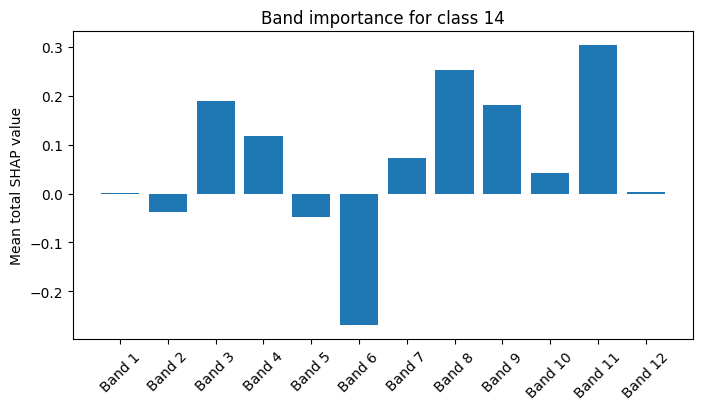

In [ ]:
# Import thư viện
import torch
import torch.nn as nn
import shap
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from tqdm import tqdm
import timm
import random

# model_path = "/content/drive/MyDrive/my_pytorch_model_bigearth_1.pth"
# 🔥 Chọn device: ưu tiên GPU nếu có
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model = torch.load(model_path, map_location=device, weights_only=False)
# model.eval()
# print("Model loaded and moved to", device)

# Wrapper model cho 1 class
class_idx = 14  # Thay class bạn muốn xem (0-18)
class MultiLabelModel(nn.Module):
    def __init__(self, base_model, class_idx):
        super().__init__()
        self.base_model = base_model
        self.class_idx = class_idx

    def forward(self, x):
        logits = torch.sigmoid(self.base_model(x))
        return logits[:, self.class_idx].unsqueeze(-1)  # shape (batch, 1)

class_model = MultiLabelModel(model, class_idx).to(device)

# Background & test images
background_imgs = []
num_needed = 150  # số lượng background cần lấy

for imgs, labels in test_loader:
    # labels shape: (batch_size, num_classes)
    # Kiểm tra xem ảnh nào trong batch có chứa class_idx (=1, kh chứa là =0)
    mask = labels[:, class_idx] == 0  # multi-label binary
    selected_imgs = imgs[mask]

    # Thêm các ảnh có chứa class_idx vào danh sách
    background_imgs.append(selected_imgs)

    # Kiểm tra đã đủ số lượng chưa
    total_found = sum(img.shape[0] for img in background_imgs)
    if total_found >= num_needed:
        break
# Nối lại thành tensor
background_imgs = torch.cat(background_imgs, dim=0)[:num_needed].to(device)

# ✅ Danh sách lưu index các ảnh mà model dự đoán có class_i
predicted_indices = []

# ✅ Số lượng ảnh muốn explain
num_explain = 1000

print(f"🔎 Đang tìm {num_explain} ảnh mà model dự đoán có class {class_idx}...")

for idx in range(len(test_dataset)):
    img, _ = test_dataset[idx]
    img_batch = img.unsqueeze(0).to(device)  # thêm batch dim

    with torch.no_grad():
        prob = model(img_batch)[0, class_idx].item()
        pred = int(prob > 0.5)

    # Nếu model dự đoán class_i → thêm vào danh sách
    if pred == 1:
        predicted_indices.append(idx)
        print(f"✅ Found at index {idx} (prob={prob:.3f})")

    # ✅ Dừng khi đủ số lượng
    if len(predicted_indices) >= num_explain:
        print(f"🎯 Đã tìm đủ {num_explain} ảnh.")
        break

# 🚨 Kiểm tra nếu không đủ số lượng
if len(predicted_indices) < num_explain:
    print(f"⚠️ Chỉ tìm được {len(predicted_indices)} ảnh, sẽ tiếp tục với số lượng này.")
    num_explain = len(predicted_indices)  # ✅ Cập nhật lại số lượng thực tế


# ✅ Lấy các ảnh và labels để explain
test_imgs_list, test_labels_list = [], []
for idx in predicted_indices:
    img, label = test_dataset[idx]
    test_imgs_list.append(img.unsqueeze(0))  # thêm batch dim
    test_labels_list.append(label)

# ✅ Stack thành batch (num_explain, C, H, W)
test_imgs = torch.cat(test_imgs_list, dim=0).to(device)
test_labels = torch.stack(test_labels_list)

with torch.no_grad():
    probs = model(test_imgs)
    preds = (probs > 0.5).int()

# Hiển thị thông tin từng ảnh
for i in range(num_explain):
    print(f"Ảnh {i+1}:")
    print("  True labels:    ", test_labels_list[i].numpy())
    print("  Predicted probs:", np.round(probs[i].cpu().numpy(), 3))
    print("  Predicted labels:", preds[i].cpu().numpy())
    print(f"  Class {class_idx} probability: {probs[i, class_idx].item():.4f}\n")

# GradientExplainer
explainer = shap.GradientExplainer(class_model, background_imgs)

# Tính SHAP values
print(f"Calculating SHAP for class {class_idx} ...")
shap_values = explainer.shap_values(test_imgs)

print(shap_values.shape)  # (10, 12, 224, 224, 1)
shap_array = np.squeeze(shap_values)  # shape (10, 12, 224, 224)
print("shap_array shape:", shap_array.shape)

# Tổng SHAP theo từng band trên mỗi ảnh
total_shap = shap_array.sum(axis=(2, 3))  # shape (10, 12)

# Trung bình trên toàn bộ ảnh
mean_total_signed = total_shap.mean(axis=0)  # shape (12,)
print("mean_total_signed shape:", mean_total_signed.shape)

# Vẽ bar chart
plt.figure(figsize=(8, 4))
plt.bar(np.arange(1, 13), mean_total_signed)
plt.xticks(np.arange(1, 13), [f'Band {i}' for i in range(1, 13)], rotation=45)
plt.ylabel('Mean total SHAP value')
plt.title(f'Band importance for class {class_idx}')
plt.show()

🔎 Đang tìm 1000 ảnh mà model dự đoán có class 15...
✅ Found at index 653 (prob=2.542)
✅ Found at index 727 (prob=4.633)
✅ Found at index 974 (prob=2.623)
✅ Found at index 1428 (prob=3.259)
✅ Found at index 1608 (prob=1.312)
✅ Found at index 1733 (prob=4.133)
✅ Found at index 2025 (prob=1.649)
✅ Found at index 2228 (prob=3.658)
✅ Found at index 2404 (prob=0.887)
✅ Found at index 2493 (prob=0.739)
✅ Found at index 3576 (prob=1.510)
✅ Found at index 4312 (prob=1.397)
✅ Found at index 4404 (prob=1.896)
✅ Found at index 5059 (prob=2.061)
✅ Found at index 5854 (prob=1.032)
✅ Found at index 5891 (prob=2.251)
✅ Found at index 5930 (prob=1.393)
✅ Found at index 6245 (prob=5.824)
✅ Found at index 6272 (prob=4.210)
✅ Found at index 6299 (prob=2.283)
✅ Found at index 7492 (prob=0.660)
✅ Found at index 7667 (prob=0.734)
✅ Found at index 7873 (prob=5.477)
✅ Found at index 8654 (prob=0.968)
✅ Found at index 8675 (prob=1.209)
✅ Found at index 9107 (prob=2.400)
✅ Found at index 9757 (prob=3.290)
✅ Foun

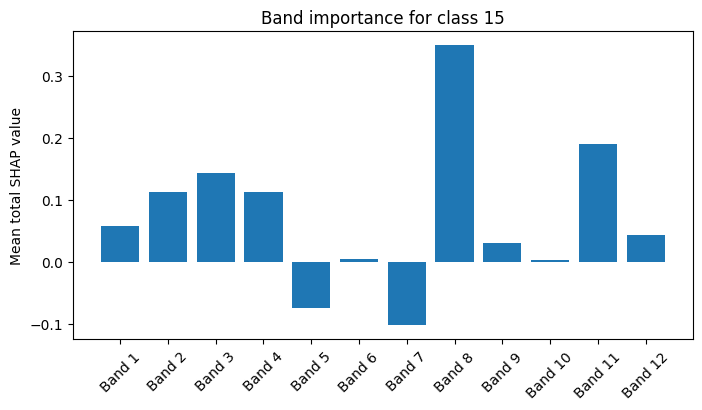

In [ ]:
# Import thư viện
import torch
import torch.nn as nn
import shap
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from tqdm import tqdm
import timm
import random

# model_path = "/content/drive/MyDrive/my_pytorch_model_bigearth_1.pth"
# 🔥 Chọn device: ưu tiên GPU nếu có
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model = torch.load(model_path, map_location=device, weights_only=False)
# model.eval()
# print("Model loaded and moved to", device)

# Wrapper model cho 1 class
class_idx = 15  # Thay class bạn muốn xem (0-18)
class MultiLabelModel(nn.Module):
    def __init__(self, base_model, class_idx):
        super().__init__()
        self.base_model = base_model
        self.class_idx = class_idx

    def forward(self, x):
        logits = torch.sigmoid(self.base_model(x))
        return logits[:, self.class_idx].unsqueeze(-1)  # shape (batch, 1)

class_model = MultiLabelModel(model, class_idx).to(device)

# Background & test images
background_imgs = []
num_needed = 150  # số lượng background cần lấy

for imgs, labels in test_loader:
    # labels shape: (batch_size, num_classes)
    # Kiểm tra xem ảnh nào trong batch có chứa class_idx (=1, kh chứa là =0)
    mask = labels[:, class_idx] == 0  # multi-label binary
    selected_imgs = imgs[mask]

    # Thêm các ảnh có chứa class_idx vào danh sách
    background_imgs.append(selected_imgs)

    # Kiểm tra đã đủ số lượng chưa
    total_found = sum(img.shape[0] for img in background_imgs)
    if total_found >= num_needed:
        break
# Nối lại thành tensor
background_imgs = torch.cat(background_imgs, dim=0)[:num_needed].to(device)

# ✅ Danh sách lưu index các ảnh mà model dự đoán có class_i
predicted_indices = []

# ✅ Số lượng ảnh muốn explain
num_explain = 1000

print(f"🔎 Đang tìm {num_explain} ảnh mà model dự đoán có class {class_idx}...")

for idx in range(len(test_dataset)):
    img, _ = test_dataset[idx]
    img_batch = img.unsqueeze(0).to(device)  # thêm batch dim

    with torch.no_grad():
        prob = model(img_batch)[0, class_idx].item()
        pred = int(prob > 0.5)

    # Nếu model dự đoán class_i → thêm vào danh sách
    if pred == 1:
        predicted_indices.append(idx)
        print(f"✅ Found at index {idx} (prob={prob:.3f})")

    # ✅ Dừng khi đủ số lượng
    if len(predicted_indices) >= num_explain:
        print(f"🎯 Đã tìm đủ {num_explain} ảnh.")
        break

# 🚨 Kiểm tra nếu không đủ số lượng
if len(predicted_indices) < num_explain:
    print(f"⚠️ Chỉ tìm được {len(predicted_indices)} ảnh, sẽ tiếp tục với số lượng này.")
    num_explain = len(predicted_indices)  # ✅ Cập nhật lại số lượng thực tế


# ✅ Lấy các ảnh và labels để explain
test_imgs_list, test_labels_list = [], []
for idx in predicted_indices:
    img, label = test_dataset[idx]
    test_imgs_list.append(img.unsqueeze(0))  # thêm batch dim
    test_labels_list.append(label)

# ✅ Stack thành batch (num_explain, C, H, W)
test_imgs = torch.cat(test_imgs_list, dim=0).to(device)
test_labels = torch.stack(test_labels_list)

with torch.no_grad():
    probs = model(test_imgs)
    preds = (probs > 0.5).int()

# Hiển thị thông tin từng ảnh
for i in range(num_explain):
    print(f"Ảnh {i+1}:")
    print("  True labels:    ", test_labels_list[i].numpy())
    print("  Predicted probs:", np.round(probs[i].cpu().numpy(), 3))
    print("  Predicted labels:", preds[i].cpu().numpy())
    print(f"  Class {class_idx} probability: {probs[i, class_idx].item():.4f}\n")

# GradientExplainer
explainer = shap.GradientExplainer(class_model, background_imgs)

# Tính SHAP values
print(f"Calculating SHAP for class {class_idx} ...")
shap_values = explainer.shap_values(test_imgs)

print(shap_values.shape)  # (10, 12, 224, 224, 1)
shap_array = np.squeeze(shap_values)  # shape (10, 12, 224, 224)
print("shap_array shape:", shap_array.shape)

# Tổng SHAP theo từng band trên mỗi ảnh
total_shap = shap_array.sum(axis=(2, 3))  # shape (10, 12)

# Trung bình trên toàn bộ ảnh
mean_total_signed = total_shap.mean(axis=0)  # shape (12,)
print("mean_total_signed shape:", mean_total_signed.shape)

# Vẽ bar chart
plt.figure(figsize=(8, 4))
plt.bar(np.arange(1, 13), mean_total_signed)
plt.xticks(np.arange(1, 13), [f'Band {i}' for i in range(1, 13)], rotation=45)
plt.ylabel('Mean total SHAP value')
plt.title(f'Band importance for class {class_idx}')
plt.show()

🔎 Đang tìm 1000 ảnh mà model dự đoán có class 16...
✅ Found at index 12 (prob=2.736)
✅ Found at index 297 (prob=2.105)
✅ Found at index 433 (prob=0.582)
✅ Found at index 482 (prob=5.004)
✅ Found at index 643 (prob=1.322)
✅ Found at index 880 (prob=4.957)
✅ Found at index 925 (prob=0.755)
✅ Found at index 953 (prob=2.947)
✅ Found at index 980 (prob=5.705)
✅ Found at index 1215 (prob=0.732)
✅ Found at index 1229 (prob=2.217)
✅ Found at index 1293 (prob=1.065)
✅ Found at index 1347 (prob=3.477)
✅ Found at index 1402 (prob=8.698)
✅ Found at index 1553 (prob=5.006)
✅ Found at index 1635 (prob=1.904)
✅ Found at index 1647 (prob=1.367)
✅ Found at index 1650 (prob=2.008)
✅ Found at index 1712 (prob=1.037)
✅ Found at index 1754 (prob=3.090)
✅ Found at index 1776 (prob=0.857)
✅ Found at index 1890 (prob=4.736)
✅ Found at index 1941 (prob=2.952)
✅ Found at index 1946 (prob=1.221)
✅ Found at index 1994 (prob=1.789)
✅ Found at index 2033 (prob=1.073)
✅ Found at index 2284 (prob=3.847)
✅ Found at in

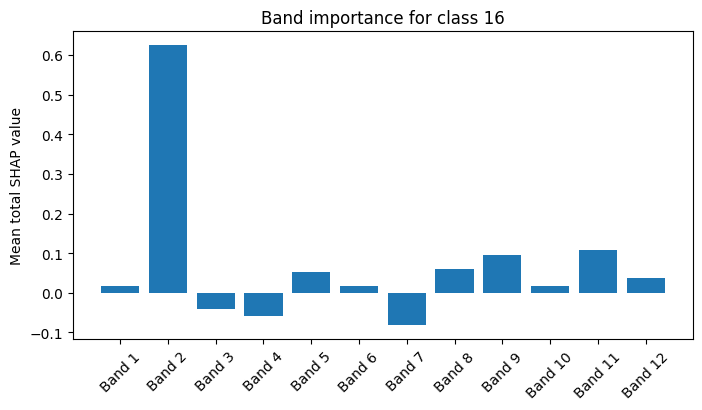

In [ ]:
# Import thư viện
import torch
import torch.nn as nn
import shap
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from tqdm import tqdm
import timm
import random

# model_path = "/content/drive/MyDrive/my_pytorch_model_bigearth_1.pth"
# 🔥 Chọn device: ưu tiên GPU nếu có
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model = torch.load(model_path, map_location=device, weights_only=False)
# model.eval()
# print("Model loaded and moved to", device)

# Wrapper model cho 1 class
class_idx = 16  # Thay class bạn muốn xem (0-18)
class MultiLabelModel(nn.Module):
    def __init__(self, base_model, class_idx):
        super().__init__()
        self.base_model = base_model
        self.class_idx = class_idx

    def forward(self, x):
        logits = torch.sigmoid(self.base_model(x))
        return logits[:, self.class_idx].unsqueeze(-1)  # shape (batch, 1)

class_model = MultiLabelModel(model, class_idx).to(device)

# Background & test images
background_imgs = []
num_needed = 150  # số lượng background cần lấy

for imgs, labels in test_loader:
    # labels shape: (batch_size, num_classes)
    # Kiểm tra xem ảnh nào trong batch có chứa class_idx (=1, kh chứa là =0)
    mask = labels[:, class_idx] == 0  # multi-label binary
    selected_imgs = imgs[mask]

    # Thêm các ảnh có chứa class_idx vào danh sách
    background_imgs.append(selected_imgs)

    # Kiểm tra đã đủ số lượng chưa
    total_found = sum(img.shape[0] for img in background_imgs)
    if total_found >= num_needed:
        break
# Nối lại thành tensor
background_imgs = torch.cat(background_imgs, dim=0)[:num_needed].to(device)

# ✅ Danh sách lưu index các ảnh mà model dự đoán có class_i
predicted_indices = []

# ✅ Số lượng ảnh muốn explain
num_explain = 1000

print(f"🔎 Đang tìm {num_explain} ảnh mà model dự đoán có class {class_idx}...")

for idx in range(len(test_dataset)):
    img, _ = test_dataset[idx]
    img_batch = img.unsqueeze(0).to(device)  # thêm batch dim

    with torch.no_grad():
        prob = model(img_batch)[0, class_idx].item()
        pred = int(prob > 0.5)

    # Nếu model dự đoán class_i → thêm vào danh sách
    if pred == 1:
        predicted_indices.append(idx)
        print(f"✅ Found at index {idx} (prob={prob:.3f})")

    # ✅ Dừng khi đủ số lượng
    if len(predicted_indices) >= num_explain:
        print(f"🎯 Đã tìm đủ {num_explain} ảnh.")
        break

# 🚨 Kiểm tra nếu không đủ số lượng
if len(predicted_indices) < num_explain:
    print(f"⚠️ Chỉ tìm được {len(predicted_indices)} ảnh, sẽ tiếp tục với số lượng này.")
    num_explain = len(predicted_indices)  # ✅ Cập nhật lại số lượng thực tế


# ✅ Lấy các ảnh và labels để explain
test_imgs_list, test_labels_list = [], []
for idx in predicted_indices:
    img, label = test_dataset[idx]
    test_imgs_list.append(img.unsqueeze(0))  # thêm batch dim
    test_labels_list.append(label)

# ✅ Stack thành batch (num_explain, C, H, W)
test_imgs = torch.cat(test_imgs_list, dim=0).to(device)
test_labels = torch.stack(test_labels_list)

with torch.no_grad():
    probs = model(test_imgs)
    preds = (probs > 0.5).int()

# Hiển thị thông tin từng ảnh
for i in range(num_explain):
    print(f"Ảnh {i+1}:")
    print("  True labels:    ", test_labels_list[i].numpy())
    print("  Predicted probs:", np.round(probs[i].cpu().numpy(), 3))
    print("  Predicted labels:", preds[i].cpu().numpy())
    print(f"  Class {class_idx} probability: {probs[i, class_idx].item():.4f}\n")

# GradientExplainer
explainer = shap.GradientExplainer(class_model, background_imgs)

# Tính SHAP values
print(f"Calculating SHAP for class {class_idx} ...")
shap_values = explainer.shap_values(test_imgs)

print(shap_values.shape)  # (10, 12, 224, 224, 1)
shap_array = np.squeeze(shap_values)  # shape (10, 12, 224, 224)
print("shap_array shape:", shap_array.shape)

# Tổng SHAP theo từng band trên mỗi ảnh
total_shap = shap_array.sum(axis=(2, 3))  # shape (10, 12)

# Trung bình trên toàn bộ ảnh
mean_total_signed = total_shap.mean(axis=0)  # shape (12,)
print("mean_total_signed shape:", mean_total_signed.shape)

# Vẽ bar chart
plt.figure(figsize=(8, 4))
plt.bar(np.arange(1, 13), mean_total_signed)
plt.xticks(np.arange(1, 13), [f'Band {i}' for i in range(1, 13)], rotation=45)
plt.ylabel('Mean total SHAP value')
plt.title(f'Band importance for class {class_idx}')
plt.show()

🔎 Đang tìm 1000 ảnh mà model dự đoán có class 17...
✅ Found at index 22 (prob=8.224)
✅ Found at index 150 (prob=2.192)
✅ Found at index 372 (prob=7.928)
✅ Found at index 421 (prob=2.788)
✅ Found at index 426 (prob=2.741)
✅ Found at index 853 (prob=1.089)
✅ Found at index 987 (prob=4.831)
✅ Found at index 1031 (prob=4.137)
✅ Found at index 1661 (prob=0.882)
✅ Found at index 1722 (prob=1.414)
✅ Found at index 1807 (prob=1.211)
✅ Found at index 1942 (prob=6.168)
✅ Found at index 1945 (prob=0.874)
✅ Found at index 2131 (prob=4.249)
✅ Found at index 2168 (prob=7.068)
✅ Found at index 3111 (prob=3.602)
✅ Found at index 3281 (prob=2.160)
✅ Found at index 3290 (prob=3.756)
✅ Found at index 3352 (prob=5.166)
✅ Found at index 3537 (prob=2.809)
✅ Found at index 3559 (prob=3.483)
✅ Found at index 4655 (prob=2.648)
✅ Found at index 4832 (prob=6.852)
✅ Found at index 4913 (prob=2.945)
✅ Found at index 5164 (prob=5.233)
✅ Found at index 5810 (prob=1.565)
✅ Found at index 5826 (prob=1.720)
✅ Found at 

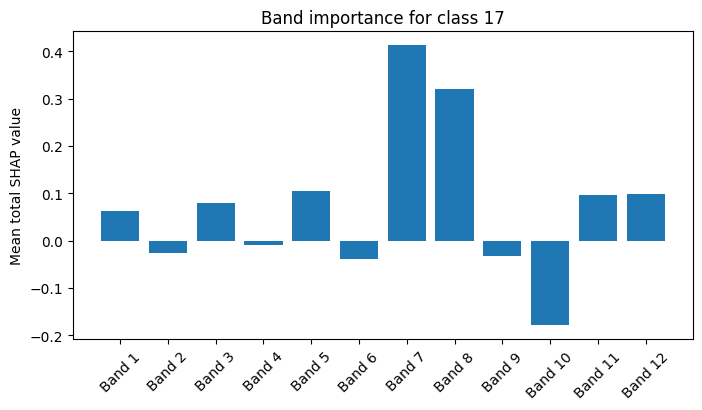

In [ ]:
# Import thư viện
import torch
import torch.nn as nn
import shap
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from tqdm import tqdm
import timm
import random

# model_path = "/content/drive/MyDrive/my_pytorch_model_bigearth_1.pth"
# Chọn device: ưu tiên GPU nếu có
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model = torch.load(model_path, map_location=device, weights_only=False)
# model.eval()
# print("Model loaded and moved to", device)

# Wrapper model cho 1 class
class_idx = 17  # Thay class bạn muốn xem (0-18)
class MultiLabelModel(nn.Module):
    def __init__(self, base_model, class_idx):
        super().__init__()
        self.base_model = base_model
        self.class_idx = class_idx

    def forward(self, x):
        logits = torch.sigmoid(self.base_model(x))
        return logits[:, self.class_idx].unsqueeze(-1)  # shape (batch, 1)

class_model = MultiLabelModel(model, class_idx).to(device)

# Background & test images
background_imgs = []
num_needed = 150  # số lượng background cần lấy

for imgs, labels in test_loader:
    # labels shape: (batch_size, num_classes)
    # Kiểm tra xem ảnh nào trong batch có chứa class_idx (=1, kh chứa là =0)
    mask = labels[:, class_idx] == 0  # multi-label binary
    selected_imgs = imgs[mask]

    # Thêm các ảnh có chứa class_idx vào danh sách
    background_imgs.append(selected_imgs)

    # Kiểm tra đã đủ số lượng chưa
    total_found = sum(img.shape[0] for img in background_imgs)
    if total_found >= num_needed:
        break
# Nối lại thành tensor
background_imgs = torch.cat(background_imgs, dim=0)[:num_needed].to(device)

# Danh sách lưu index các ảnh mà model dự đoán có class_i
predicted_indices = []

# Số lượng ảnh muốn explain
num_explain = 1000

print(f" Đang tìm {num_explain} ảnh mà model dự đoán có class {class_idx}...")

for idx in range(len(test_dataset)):
    img, _ = test_dataset[idx]
    img_batch = img.unsqueeze(0).to(device)  # thêm batch dim

    with torch.no_grad():
        prob = model(img_batch)[0, class_idx].item()
        pred = int(prob > 0.5)

    # Nếu model dự đoán class_i → thêm vào danh sách
    if pred == 1:
        predicted_indices.append(idx)
        print(f"Found at index {idx} (prob={prob:.3f})")

    # Dừng khi đủ số lượng
    if len(predicted_indices) >= num_explain:
        print(f" Đã tìm đủ {num_explain} ảnh.")
        break

# Kiểm tra nếu không đủ số lượng
if len(predicted_indices) < num_explain:
    print(f" Chỉ tìm được {len(predicted_indices)} ảnh, sẽ tiếp tục với số lượng này.")
    num_explain = len(predicted_indices)  #  Cập nhật lại số lượng thực tế


# Lấy các ảnh và labels để explain
test_imgs_list, test_labels_list = [], []
for idx in predicted_indices:
    img, label = test_dataset[idx]
    test_imgs_list.append(img.unsqueeze(0))  # thêm batch dim
    test_labels_list.append(label)

# Stack thành batch (num_explain, C, H, W)
test_imgs = torch.cat(test_imgs_list, dim=0).to(device)
test_labels = torch.stack(test_labels_list)

with torch.no_grad():
    probs = model(test_imgs)
    preds = (probs > 0.5).int()

# Hiển thị thông tin từng ảnh
for i in range(num_explain):
    print(f"Ảnh {i+1}:")
    print("  True labels:    ", test_labels_list[i].numpy())
    print("  Predicted probs:", np.round(probs[i].cpu().numpy(), 3))
    print("  Predicted labels:", preds[i].cpu().numpy())
    print(f"  Class {class_idx} probability: {probs[i, class_idx].item():.4f}\n")

# GradientExplainer
explainer = shap.GradientExplainer(class_model, background_imgs)

# Tính SHAP values
print(f"Calculating SHAP for class {class_idx} ...")
shap_values = explainer.shap_values(test_imgs)

print(shap_values.shape)  # (10, 12, 224, 224, 1)
shap_array = np.squeeze(shap_values)  # shape (10, 12, 224, 224)
print("shap_array shape:", shap_array.shape)

# Tổng SHAP theo từng band trên mỗi ảnh
total_shap = shap_array.sum(axis=(2, 3))  # shape (10, 12)

# Trung bình trên toàn bộ ảnh
mean_total_signed = total_shap.mean(axis=0)  # shape (12,)
print("mean_total_signed shape:", mean_total_signed.shape)

# Vẽ bar chart
plt.figure(figsize=(8, 4))
plt.bar(np.arange(1, 13), mean_total_signed)
plt.xticks(np.arange(1, 13), [f'Band {i}' for i in range(1, 13)], rotation=45)
plt.ylabel('Mean total SHAP value')
plt.title(f'Band importance for class {class_idx}')
plt.show()

🔎 Đang tìm 1000 ảnh mà model dự đoán có class 18...
✅ Found at index 43 (prob=22.260)
✅ Found at index 67 (prob=14.956)
✅ Found at index 240 (prob=15.071)
✅ Found at index 502 (prob=7.295)
✅ Found at index 670 (prob=15.298)
✅ Found at index 713 (prob=16.845)
✅ Found at index 1246 (prob=12.571)
✅ Found at index 2326 (prob=3.137)
✅ Found at index 2388 (prob=1.900)
✅ Found at index 2550 (prob=6.615)
✅ Found at index 2869 (prob=4.840)
✅ Found at index 3264 (prob=4.979)
✅ Found at index 3920 (prob=1.128)
✅ Found at index 4049 (prob=3.166)
✅ Found at index 4210 (prob=3.134)
✅ Found at index 4412 (prob=15.981)
✅ Found at index 4414 (prob=0.954)
✅ Found at index 4492 (prob=3.519)
✅ Found at index 4713 (prob=10.811)
✅ Found at index 6007 (prob=1.376)
✅ Found at index 6291 (prob=31.645)
✅ Found at index 6318 (prob=1.255)
✅ Found at index 6408 (prob=10.854)
✅ Found at index 7249 (prob=19.740)
✅ Found at index 7412 (prob=1.389)
✅ Found at index 8274 (prob=27.118)
✅ Found at index 8370 (prob=0.708)

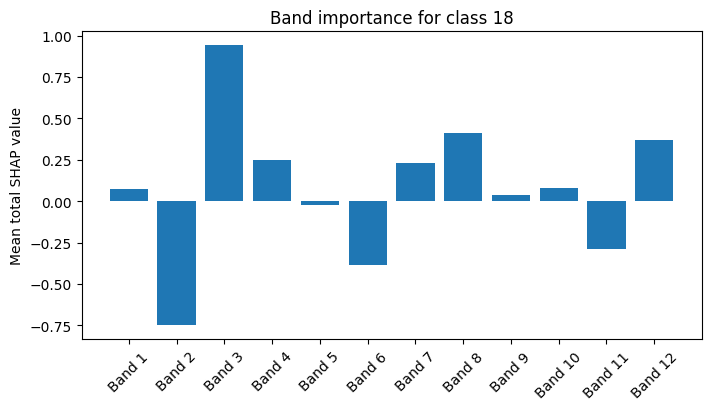

In [ ]:
# Import thư viện
import torch
import torch.nn as nn
import shap
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from tqdm import tqdm
import timm
import random

# model_path = "/content/drive/MyDrive/my_pytorch_model_bigearth_1.pth"
# Chọn device: ưu tiên GPU nếu có
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model = torch.load(model_path, map_location=device, weights_only=False)
# model.eval()
# print("Model loaded and moved to", device)

# Wrapper model cho 1 class
class_idx = 18  # Thay class bạn muốn xem (0-18)
class MultiLabelModel(nn.Module):
    def __init__(self, base_model, class_idx):
        super().__init__()
        self.base_model = base_model
        self.class_idx = class_idx

    def forward(self, x):
        logits = torch.sigmoid(self.base_model(x))
        return logits[:, self.class_idx].unsqueeze(-1)  # shape (batch, 1)

class_model = MultiLabelModel(model, class_idx).to(device)

# Background & test images
background_imgs = []
num_needed = 150  # số lượng background cần lấy

for imgs, labels in test_loader:
    # labels shape: (batch_size, num_classes)
    # Kiểm tra xem ảnh nào trong batch có chứa class_idx (=1, kh chứa là =0)
    mask = labels[:, class_idx] == 0  # multi-label binary
    selected_imgs = imgs[mask]

    # Thêm các ảnh có chứa class_idx vào danh sách
    background_imgs.append(selected_imgs)

    # Kiểm tra đã đủ số lượng chưa
    total_found = sum(img.shape[0] for img in background_imgs)
    if total_found >= num_needed:
        break
# Nối lại thành tensor
background_imgs = torch.cat(background_imgs, dim=0)[:num_needed].to(device)

# Danh sách lưu index các ảnh mà model dự đoán có class_i
predicted_indices = []

# Số lượng ảnh muốn explain
num_explain = 1000

print(f"Đang tìm {num_explain} ảnh mà model dự đoán có class {class_idx}...")

for idx in range(len(test_dataset)):
    img, _ = test_dataset[idx]
    img_batch = img.unsqueeze(0).to(device)  # thêm batch dim

    with torch.no_grad():
        prob = model(img_batch)[0, class_idx].item()
        pred = int(prob > 0.5)

    # Nếu model dự đoán class_i → thêm vào danh sách
    if pred == 1:
        predicted_indices.append(idx)
        print(f"Found at index {idx} (prob={prob:.3f})")

    # Dừng khi đủ số lượng
    if len(predicted_indices) >= num_explain:
        print(f"Đã tìm đủ {num_explain} ảnh.")
        break

# Kiểm tra nếu không đủ số lượng
if len(predicted_indices) < num_explain:
    print(f"Chỉ tìm được {len(predicted_indices)} ảnh, sẽ tiếp tục với số lượng này.")
    num_explain = len(predicted_indices)  # Cập nhật lại số lượng thực tế


# Lấy các ảnh và labels để explain
test_imgs_list, test_labels_list = [], []
for idx in predicted_indices:
    img, label = test_dataset[idx]
    test_imgs_list.append(img.unsqueeze(0))  # thêm batch dim
    test_labels_list.append(label)

# Stack thành batch (num_explain, C, H, W)
test_imgs = torch.cat(test_imgs_list, dim=0).to(device)
test_labels = torch.stack(test_labels_list)

with torch.no_grad():
    probs = model(test_imgs)
    preds = (probs > 0.5).int()

# Hiển thị thông tin từng ảnh
for i in range(num_explain):
    print(f"Ảnh {i+1}:")
    print("  True labels:    ", test_labels_list[i].numpy())
    print("  Predicted probs:", np.round(probs[i].cpu().numpy(), 3))
    print("  Predicted labels:", preds[i].cpu().numpy())
    print(f"  Class {class_idx} probability: {probs[i, class_idx].item():.4f}\n")

# GradientExplainer
explainer = shap.GradientExplainer(class_model, background_imgs)

# Tính SHAP values
print(f"Calculating SHAP for class {class_idx} ...")
shap_values = explainer.shap_values(test_imgs)

print(shap_values.shape)  # (10, 12, 224, 224, 1)
shap_array = np.squeeze(shap_values)  # shape (10, 12, 224, 224)
print("shap_array shape:", shap_array.shape)

# Tổng SHAP theo từng band trên mỗi ảnh
total_shap = shap_array.sum(axis=(2, 3))  # shape (10, 12)

# Trung bình trên toàn bộ ảnh
mean_total_signed = total_shap.mean(axis=0)  # shape (12,)
print("mean_total_signed shape:", mean_total_signed.shape)

# Vẽ bar chart
plt.figure(figsize=(8, 4))
plt.bar(np.arange(1, 13), mean_total_signed)
plt.xticks(np.arange(1, 13), [f'Band {i}' for i in range(1, 13)], rotation=45)
plt.ylabel('Mean total SHAP value')
plt.title(f'Band importance for class {class_idx}')
plt.show()

-----------------------------------------------------------------------------------------


/tmp/ipython-input-1309421875.py:24: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


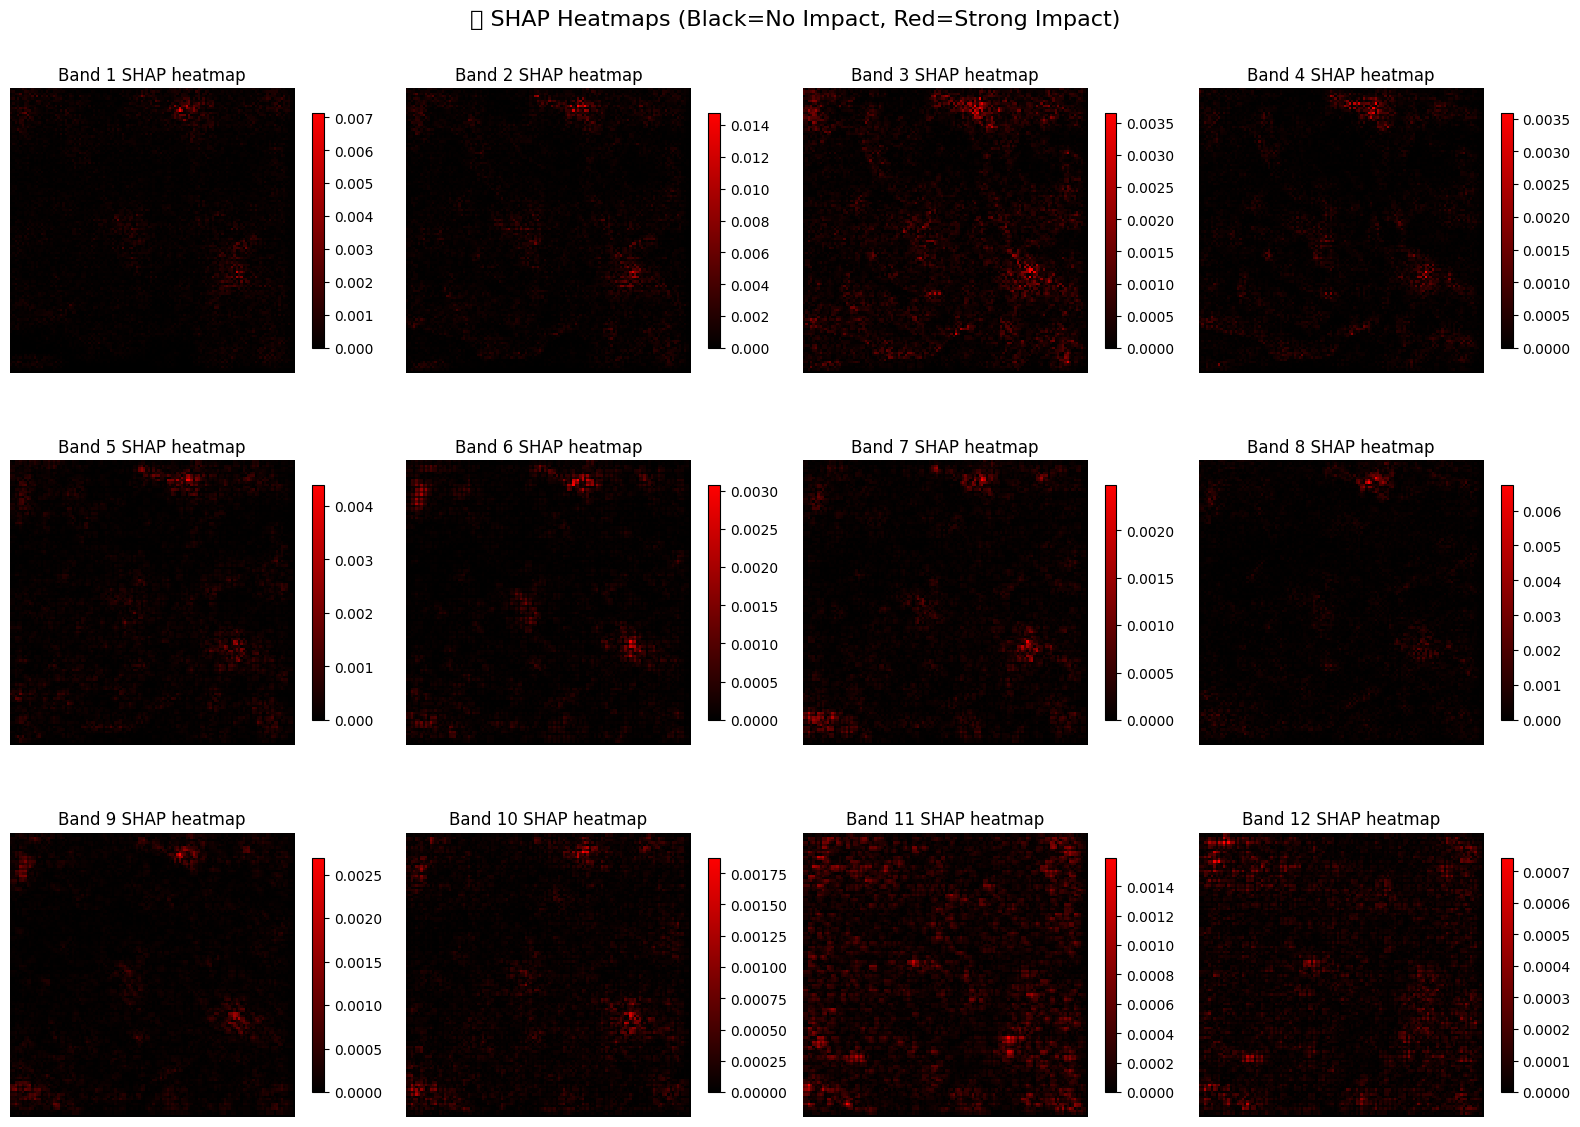

In [ ]:
import matplotlib.colors as mcolors

# Lấy array từ shap_values
shap_array = shap_values[0]  # shape: (12, H, W)

# Tạo custom colormap: black (0) -> red (high)
cmap = mcolors.LinearSegmentedColormap.from_list("black_red", ["black", "red"])

# Hiển thị heatmap cho từng band
num_bands = shap_array.shape[0]
fig, axes = plt.subplots(3, 4, figsize=(16, 12))  # 3 rows x 4 cols
axes = axes.flatten()

for i in range(num_bands):
    ax = axes[i]
    heatmap = np.abs(shap_array[i])  # lấy trị tuyệt đối cho impact

    im = ax.imshow(heatmap, cmap=cmap, interpolation='nearest')
    ax.set_title(f"Band {i+1} SHAP heatmap", fontsize=12)
    ax.axis('off')
    fig.colorbar(im, ax=ax, shrink=0.6)

plt.suptitle("SHAP Heatmaps (Black=No Impact, Red=Strong Impact)", fontsize=16)
plt.tight_layout()
plt.show()


In [ ]:
# Lấy giá trị lớn nhất & nhỏ nhất
max_value = np.argmax(mean_total_signed)
min_value = np.argmin(mean_total_signed)
print(max_value)
print(min_value)

7
5


(12, 120, 120, 1)
🔥 Band 8 có total SHAP cao nhất


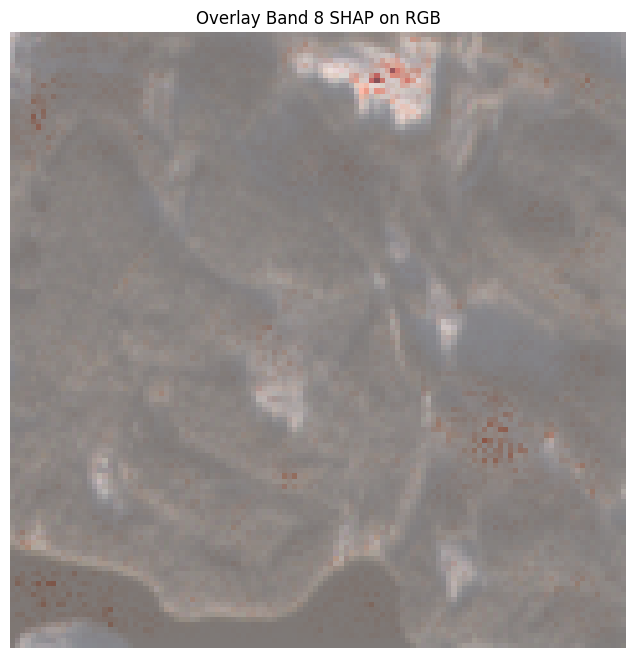

In [ ]:
# Lấy ảnh gốc
image_np = test_imgs[0].cpu().numpy().transpose(1, 2, 0)  # (224, 224, 12)
rgb = image_np[:, :, [3, 2, 1]]  # Bands 4,3,2 (gần giống RGB)
rgb = (rgb - rgb.min()) / (rgb.max() - rgb.min() + 1e-6)  # scale về [0,1]

# Tìm band có mean |SHAP| cao nhất
print(shap_array.shape)
mean_shap_per_band = shap_array.sum(axis=(1, 2))  # shape (12,)
top_band_idx = np.argmax(mean_shap_per_band)
print(f"Band {top_band_idx+1} có total SHAP cao nhất")

# Lấy heatmap của band đó và scale
heatmap = np.abs(shap_array[top_band_idx])  # (H, W)
heatmap_norm = (heatmap - heatmap.min()) / (heatmap.max() - heatmap.min() + 1e-6)  # scale 0-1

# Overlay heatmap lên ảnh gốc
plt.figure(figsize=(8, 8))
plt.imshow(rgb)
plt.imshow(heatmap_norm, cmap="Reds", alpha=0.5)  # alpha=0.5 để thấy ảnh gốc
plt.axis('off')
plt.title(f"Overlay Band {top_band_idx+1} SHAP on RGB")
plt.show()


Mask and inference testset

In [ ]:
import torch
import torch.nn as nn
import shap
import numpy as np
import matplotlib.pyplot as plt

class MultiLabelModel(nn.Module):
    def __init__(self, base_model, class_idx):
        super().__init__()
        self.base_model = base_model
        self.class_idx = class_idx

    def forward(self, x):
        logits = self.base_model(x)
        return logits[:, self.class_idx].unsqueeze(-1)

def explain_prediction_with_shap(model, image_tensor, background_imgs, class_names=None, threshold=0.5, device='cpu'):
    """
    Giải thích ảnh đầu vào bằng SHAP cho các class được model dự đoán là 1.

    Args:
        model (nn.Module): Mô hình đã huấn luyện.
        image_tensor (torch.Tensor): Ảnh đầu vào, shape (1, C, H, W).
        background_imgs (torch.Tensor): Tensor background, shape (N, C, H, W).
        class_names (list or None): Tên của các class để hiển thị. Nếu None → dùng chỉ số class.
        threshold (float): Ngưỡng để xác định class được dự đoán là 1.
        device (str): 'cpu' hoặc 'cuda'.
    """

    model = model.to(device)
    image_tensor = image_tensor.to(device)
    background_imgs = background_imgs.to(device)

    # Dự đoán output
    with torch.no_grad():
        logits = torch.sigmoid(model(image_tensor))  # shape (1, num_classes)
        predicted = (logits > threshold).int().squeeze(0)  # (num_classes,)
        predicted_classes = torch.nonzero(predicted).squeeze(1).tolist()

    if not predicted_classes:
        print("Không có class nào được dự đoán là 1. Hãy thử ảnh khác.")
        return

    print(f" Model predicted the following classes as 1: {predicted_classes}")

    for class_idx in predicted_classes:
        prob = logits[0, class_idx].item()
        print(f"\n Explaining class {class_idx} (prob={prob:.4f})...")

        # Tạo wrapper model cho class này
        class_model = MultiLabelModel(model, class_idx).to(device)

        # SHAP explainer
        explainer = shap.GradientExplainer(class_model, background_imgs)
        shap_values = explainer.shap_values(image_tensor)  # list with 1 tensor
        shap_array = np.squeeze(shap_values)  # (C, H, W)

        # Tổng SHAP theo từng band
        band_importance = shap_array.reshape(shap_array.shape[0], -1).sum(axis=1)

        # Vẽ biểu đồ
        plt.figure(figsize=(8, 4))
        plt.bar(np.arange(1, band_importance.shape[0] + 1), band_importance)
        plt.xticks(np.arange(1, band_importance.shape[0] + 1),
                   [f'Band {i}' for i in range(1, band_importance.shape[0] + 1)], rotation=45)
        plt.ylabel('Total SHAP value')
        title_class = class_names[class_idx] if class_names else f'Class {class_idx}'
        plt.title(f'SHAP Band Importance for {title_class}')
        plt.tight_layout()
        plt.show()


In [ ]:
# Tạo dict chứa background images cho từng class
background_dict = {}
num_needed = 150  # Số lượng ảnh cần cho mỗi class

for class_idx in range(19):  # giả sử có 19 class
    background_imgs = []
    total_found = 0

    for imgs, labels in test_loader:
        mask = labels[:, class_idx] == 0  # ảnh không chứa class class_idx
        selected_imgs = imgs[mask]

        if selected_imgs.shape[0] > 0:
            background_imgs.append(selected_imgs)
            total_found += selected_imgs.shape[0]

        if total_found >= num_needed:
            break

    if total_found > 0:
        # Nối lại và cắt đúng số lượng cần
        background_tensor = torch.cat(background_imgs, dim=0)[:num_needed]
        background_dict[class_idx] = background_tensor
        print(f"Collected background for class {class_idx}: {background_tensor.shape}")
    else:
        print(f"Không đủ ảnh cho class {class_idx}")

torch.save(background_dict, "backgrounds_dict_eff_shap.pt")

✅ Collected background for class 0: torch.Size([150, 12, 120, 120])
✅ Collected background for class 1: torch.Size([150, 12, 120, 120])
✅ Collected background for class 2: torch.Size([150, 12, 120, 120])
✅ Collected background for class 3: torch.Size([150, 12, 120, 120])
✅ Collected background for class 4: torch.Size([150, 12, 120, 120])
✅ Collected background for class 5: torch.Size([150, 12, 120, 120])
✅ Collected background for class 6: torch.Size([150, 12, 120, 120])
✅ Collected background for class 7: torch.Size([150, 12, 120, 120])
✅ Collected background for class 8: torch.Size([150, 12, 120, 120])
✅ Collected background for class 9: torch.Size([150, 12, 120, 120])
✅ Collected background for class 10: torch.Size([150, 12, 120, 120])
✅ Collected background for class 11: torch.Size([150, 12, 120, 120])
✅ Collected background for class 12: torch.Size([150, 12, 120, 120])
✅ Collected background for class 13: torch.Size([150, 12, 120, 120])
✅ Collected background for class 14: torch.S

In [ ]:
save_path = "/content/drive/MyDrive/Document for Capstone/Implement XAI/LIME Pictures/backgrounds_dict_eff_shap.pt"
torch.save(background_dict, save_path)

In [ ]:
background_dict = torch.load("backgrounds_dict_eff_shap.pt")
background_imgs = background_dict[class_idx].to(device)  # lấy background cho class cần giải thích